In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [380]:
df = pd.read_csv('credit_scoring.csv')

| Параметр                   | Тип данных       | Описание                                                                 |
|---------------------------|------------------|-------------------------------------------------------------------------|
| **client_id**             | Целое число      | ID клиента (неотрицательное)                                           |
| **Age**                   | Вещественное     | Возраст клиента                                                        |
| **Income**                | Вещественное     | Месячный доход клиента                                                 |
| **BalanceToCreditLimit**  | Вещественное     | Отношение баланса на кредитной карте к лимиту по кредиту               |
| **DIR**                   | Вещественное     | Debt-to-income Ratio (отношение долга к доходу)                        |
| **NumLoans**             | Натуральное число | Число займов и кредитных линий                                        |
| **NumRealEstateLoans**    | Натуральное число | Число ипотек и займов, связанных с недвижимостью                       |
| **NumDependents**         | Натуральное число | Число членов семьи, которых содержит клиент (исключая самого клиента) |
| **Num30-59Delinquencies** | Натуральное число | Число просрочек выплат по кредиту от 30 до 59 дней                     |
| **Num60-89Delinquencies** | Натуральное число | Число просрочек выплат по кредиту от 60 до 89 дней                     |
| **Delinquent90**          | Бинарный         | Таргет: были ли просрочки выплат по кредиту более 90 дней              |


In [381]:
df

client_id          DIR   Age  NumLoans  NumRealEstateLoans  \
0              0     0.496289  49.1        13                   0   
1              1     0.433567  48.0         9                   2   
2              2  2206.731199  55.5        21                   1   
3              3   886.132793  55.3         3                   0   
4              4     0.000000  52.3         1                   0   
...          ...          ...   ...       ...                 ...   
74995      74995     0.169463  67.6         5                   1   
74996      74996  2085.662215  43.2         1                   1   
74997      74997     0.118935  23.0         4                   0   
74998      74998     0.203414  46.3        14                   2   
74999      74999     0.037120  57.4        13                   0   

       NumDependents  Num30-59Delinquencies  Num60-89Delinquencies  \
0                0.0                      2                      0   
1                2.0                      1                      0   
2                NaN                      1                      0   
3                0.0                      0                      0   
4                0.0                      0                      0   
...              ...                    ...                    ...   
74995            0.0                      0                      0   
74996            0.0                      0                      0   
74997            0.0                      2                      0   
74998            0.0                      0                      0   
74999            0.0                      0                      0   

             Income  BalanceToCreditLimit  Delinquent90  
0       5298.360639              0.387028             0  
1       6008.056256              0.234679             0  
2               NaN              0.348227             0  
3               NaN              0.971930             0  
4       2504.613105              1.004350             0  
...             ...                   ...           ...  
74995  20129.654428              0.074689             0  
74996           NaN              1.005390             0  
74997   2019.117329              0.384511             0  
74998  16823.909642              0.524093             0  
74999  10556.892855              0.075616             0  

[75000 rows x 11 columns]

In [382]:
df.describe()

client_id            DIR           Age     NumLoans  \
count  75000.000000   75000.000000  75000.000000  75000.00000   
mean   37499.500000     353.260293     52.595605      8.44976   
std    21650.779432    2117.237432     14.869729      5.15644   
min        0.000000       0.000000     21.000000      0.00000   
25%    18749.750000       0.176022     41.300000      5.00000   
50%    37499.500000       0.366848     52.200000      8.00000   
75%    56249.250000       0.862650     63.100000     11.00000   
max    74999.000000  332600.272820    109.800000     56.00000   

       NumRealEstateLoans  NumDependents  Num30-59Delinquencies  \
count        75000.000000   73084.000000           75000.000000   
mean             1.016693       0.755966               0.428320   
std              1.124019       1.108119               4.276439   
min              0.000000       0.000000               0.000000   
25%              0.000000       0.000000               0.000000   
50%              1.000000       0.000000               0.000000   
75%              2.000000       1.000000               0.000000   
max             32.000000      20.000000              98.000000   

       Num60-89Delinquencies        Income  BalanceToCreditLimit  Delinquent90  
count           75000.000000  6.015300e+04          75000.000000  75000.000000  
mean                0.248000  6.740059e+03              6.276196      0.066840  
std                 4.239486  1.422875e+04            267.743321      0.249746  
min                 0.000000  0.000000e+00              0.000000      0.000000  
25%                 0.000000  3.421354e+03              0.029703      0.000000  
50%                 0.000000  5.424552e+03              0.153720      0.000000  
75%                 0.000000  8.291518e+03              0.560638      0.000000  
max                98.000000  1.805573e+06          50873.874533      1.000000

In [383]:
# Считаем общее количество дубликатов
df['client_id'].duplicated().sum()

0

ID уникальное не отрицвтельное можно выкинуть


In [384]:
df = df.drop('client_id', axis=1)

In [385]:
df.head()

DIR   Age  NumLoans  NumRealEstateLoans  NumDependents  \
0     0.496289  49.1        13                   0            0.0   
1     0.433567  48.0         9                   2            2.0   
2  2206.731199  55.5        21                   1            NaN   
3   886.132793  55.3         3                   0            0.0   
4     0.000000  52.3         1                   0            0.0   

   Num30-59Delinquencies  Num60-89Delinquencies       Income  \
0                      2                      0  5298.360639   
1                      1                      0  6008.056256   
2                      1                      0          NaN   
3                      0                      0          NaN   
4                      0                      0  2504.613105   

   BalanceToCreditLimit  Delinquent90  
0              0.387028             0  
1              0.234679             0  
2              0.348227             0  
3              0.971930             0  
4              1.004350             0

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DIR                    75000 non-null  float64
 1   Age                    75000 non-null  float64
 2   NumLoans               75000 non-null  int64  
 3   NumRealEstateLoans     75000 non-null  int64  
 4   NumDependents          73084 non-null  float64
 5   Num30-59Delinquencies  75000 non-null  int64  
 6   Num60-89Delinquencies  75000 non-null  int64  
 7   Income                 60153 non-null  float64
 8   BalanceToCreditLimit   75000 non-null  float64
 9   Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 5.7 MB


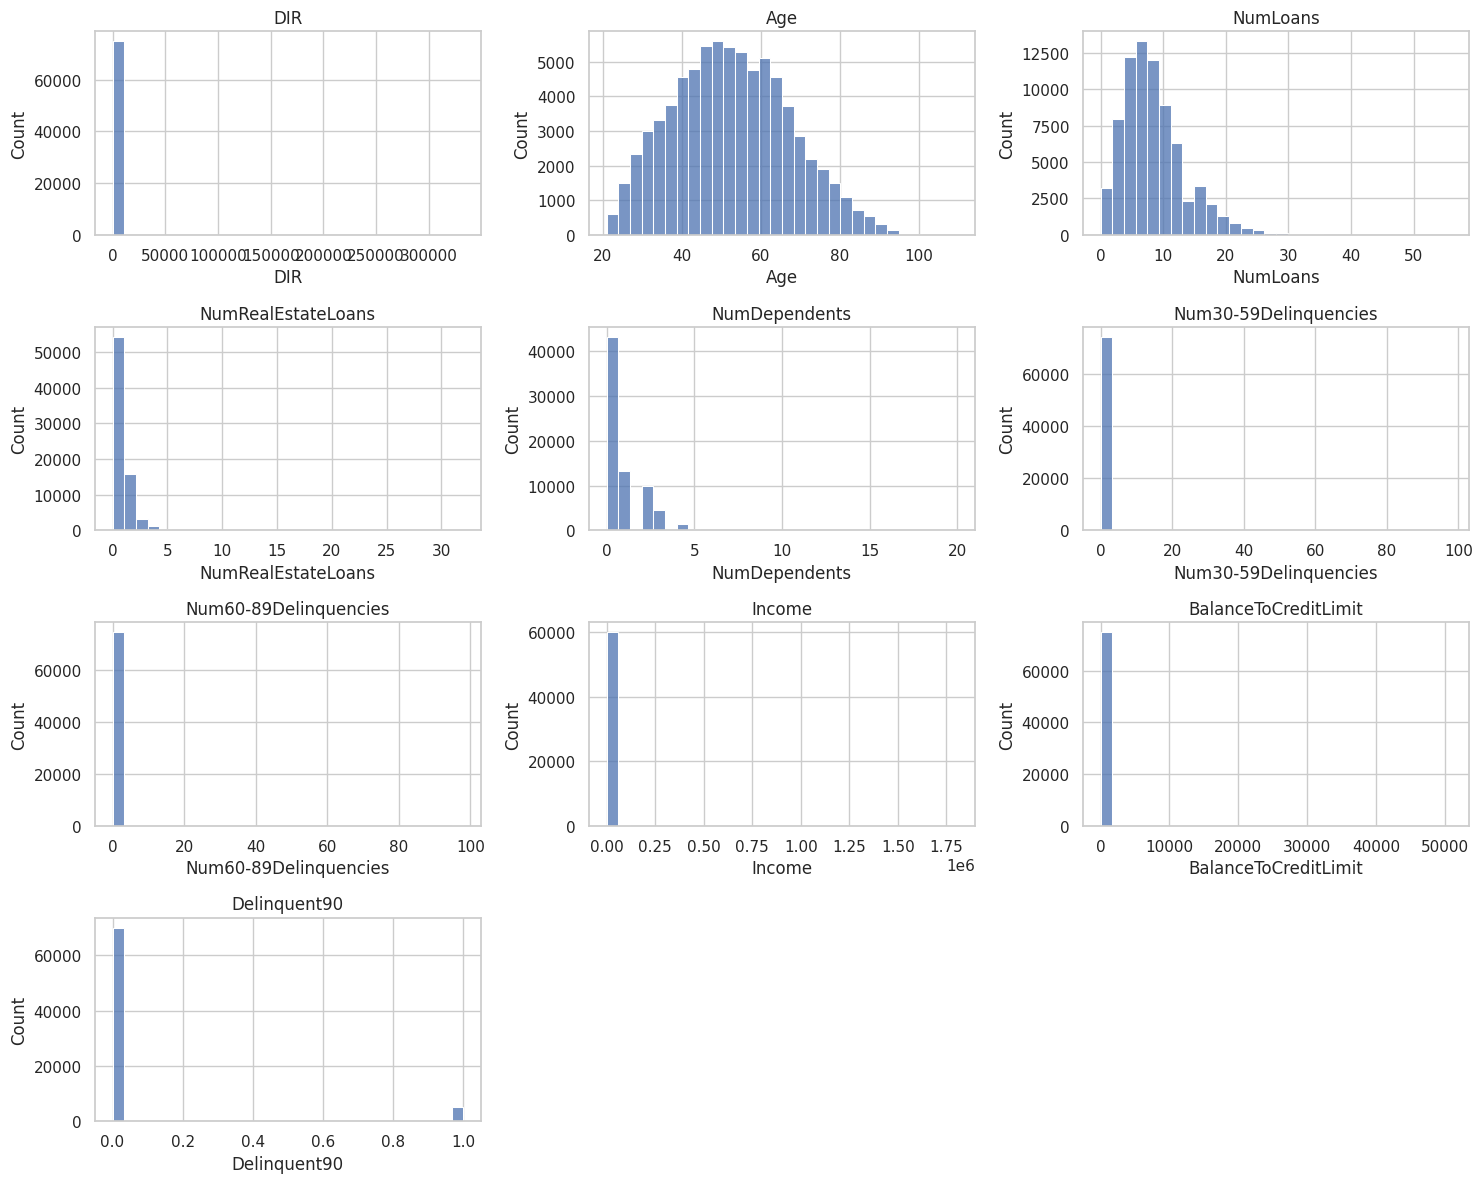

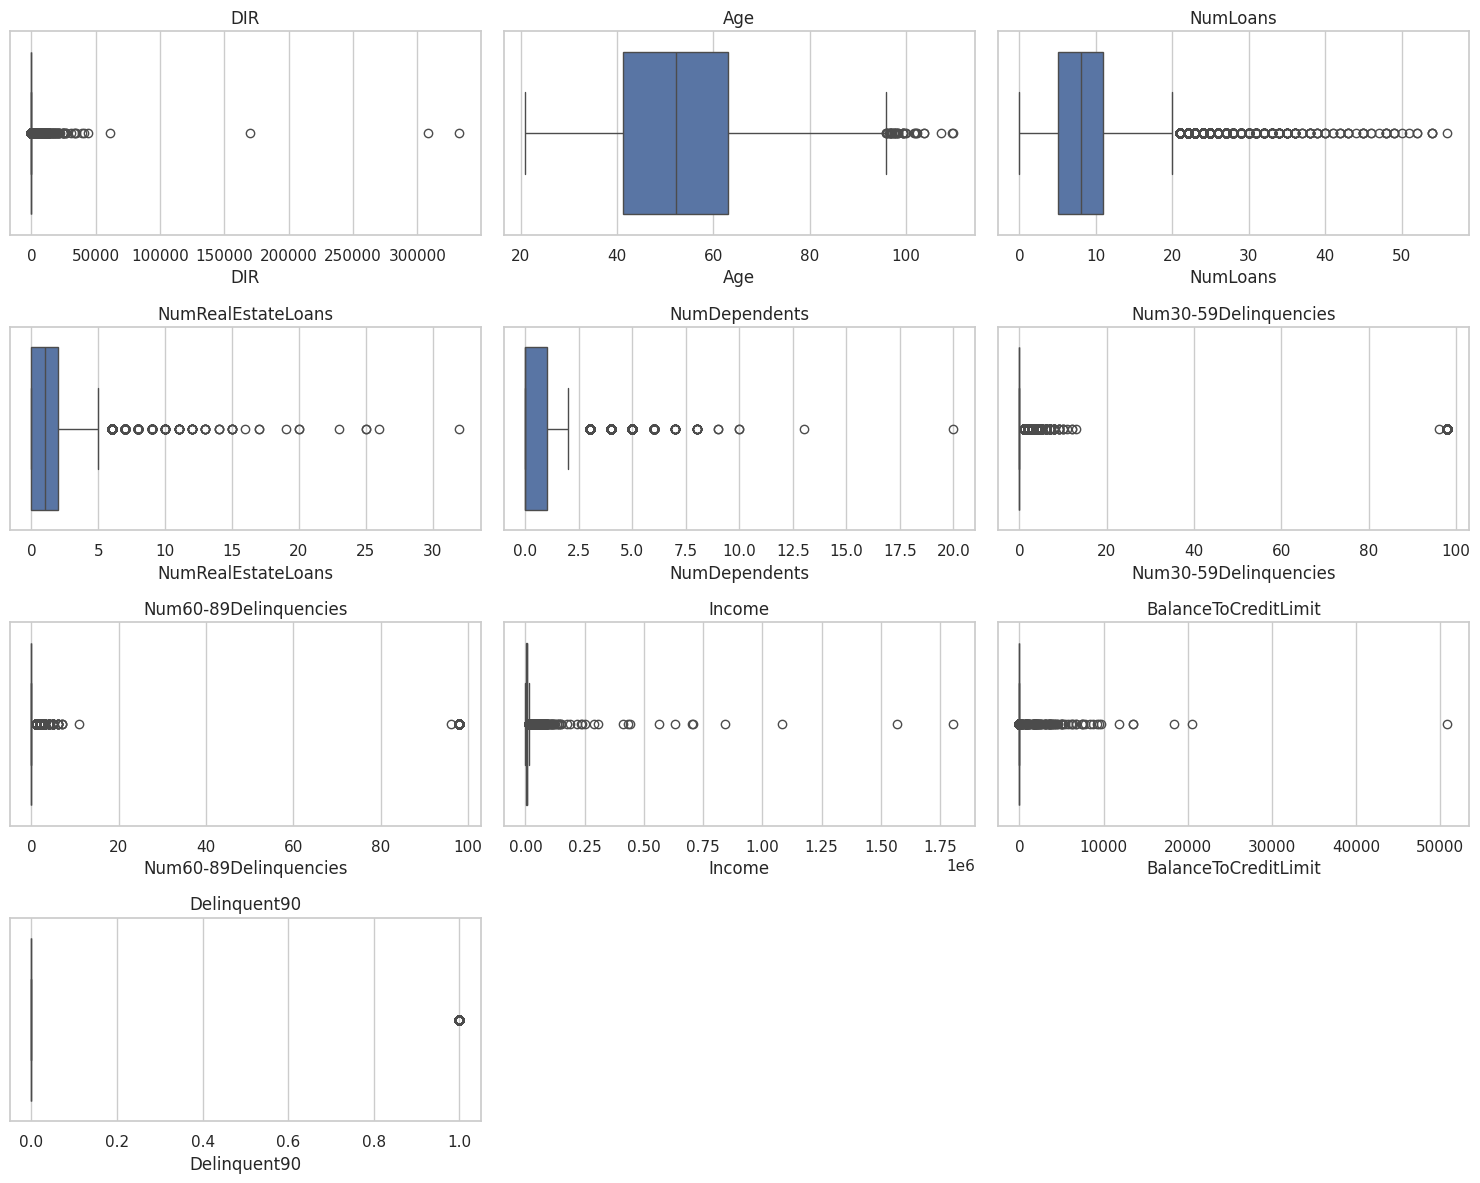

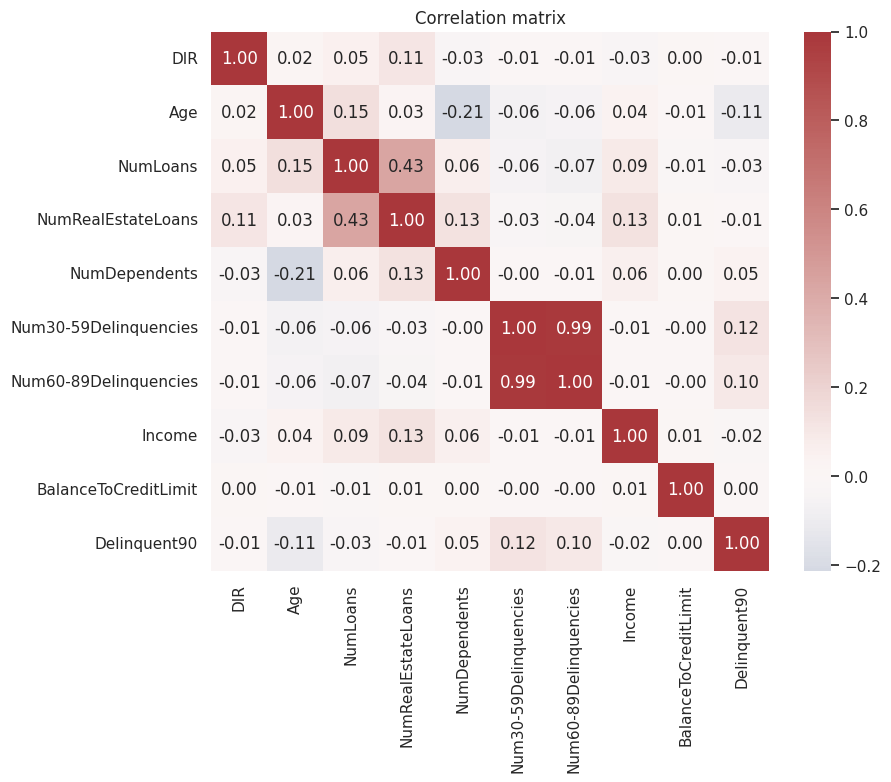

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Настройки
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

cols = ['DIR', 'Age', 'NumLoans', 'NumRealEstateLoans', 'NumDependents',
        'Num30-59Delinquencies', 'Num60-89Delinquencies', 'Income',
        'BalanceToCreditLimit', 'Delinquent90']

# Гистограммы
fig, axes = plt.subplots(len(cols)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()
for ax, c in zip(axes, cols):
    sns.histplot(df[c].dropna(), bins=30, ax=ax)
    ax.set_title(c)
for ax in axes[len(cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Boxplots
fig, axes = plt.subplots(len(cols)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()
for ax, c in zip(axes, cols):
    sns.boxplot(x=df[c].dropna(), ax=ax)
    ax.set_title(c)
for ax in axes[len(cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Корреляционная матрица
plt.figure(figsize=(9, 7))
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation matrix')
plt.show()


Заполним пропуски NumDependents нулями, в данном контексте, как будтио логично

In [388]:
df['NumDependents'].fillna(0, inplace=True)

Заполним пропуски в месячном доходе медианой 

In [389]:
df['Income'].median()

5424.552473

In [390]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [391]:
df.head()

DIR   Age  NumLoans  NumRealEstateLoans  NumDependents  \
0     0.496289  49.1        13                   0            0.0   
1     0.433567  48.0         9                   2            2.0   
2  2206.731199  55.5        21                   1            0.0   
3   886.132793  55.3         3                   0            0.0   
4     0.000000  52.3         1                   0            0.0   

   Num30-59Delinquencies  Num60-89Delinquencies       Income  \
0                      2                      0  5298.360639   
1                      1                      0  6008.056256   
2                      1                      0  5424.552473   
3                      0                      0  5424.552473   
4                      0                      0  2504.613105   

   BalanceToCreditLimit  Delinquent90  
0              0.387028             0  
1              0.234679             0  
2              0.348227             0  
3              0.971930             0  
4              1.004350             0

| Параметр                   | Тип данных       | Описание                                                                 |
|---------------------------|------------------|-------------------------------------------------------------------------|
| **client_id**             | Целое число      | ID клиента (неотрицательное)                                           |
| **Age**                   | Вещественное     | Возраст клиента                                                        |
| **Income**                | Вещественное     | Месячный доход клиента                                                 |
| **BalanceToCreditLimit**  | Вещественное     | Отношение баланса на кредитной карте к лимиту по кредиту               |
| **DIR**                   | Вещественное     | Debt-to-income Ratio (отношение долга к доходу)                        |
| **NumLoans**             | Натуральное число | Число займов и кредитных линий                                        |
| **NumRealEstateLoans**    | Натуральное число | Число ипотек и займов, связанных с недвижимостью                       |
| **NumDependents**         | Натуральное число | Число членов семьи, которых содержит клиент (исключая самого клиента) |
| **Num30-59Delinquencies** | Натуральное число | Число просрочек выплат по кредиту от 30 до 59 дней                     |
| **Num60-89Delinquencies** | Натуральное число | Число просрочек выплат по кредиту от 60 до 89 дней                     |
| **Delinquent90**          | Бинарный         | Таргет: были ли просрочки выплат по кредиту более 90 дней              |


In [392]:
df.describe()

DIR           Age     NumLoans  NumRealEstateLoans  \
count   75000.000000  75000.000000  75000.00000        75000.000000   
mean      353.260293     52.595605      8.44976            1.016693   
std      2117.237432     14.869729      5.15644            1.124019   
min         0.000000     21.000000      0.00000            0.000000   
25%         0.176022     41.300000      5.00000            0.000000   
50%         0.366848     52.200000      8.00000            1.000000   
75%         0.862650     63.100000     11.00000            2.000000   
max    332600.272820    109.800000     56.00000           32.000000   

       NumDependents  Num30-59Delinquencies  Num60-89Delinquencies  \
count   75000.000000           75000.000000           75000.000000   
mean        0.736653               0.428320               0.248000   
std         1.100357               4.276439               4.239486   
min         0.000000               0.000000               0.000000   
25%         0.000000               0.000000               0.000000   
50%         0.000000               0.000000               0.000000   
75%         1.000000               0.000000               0.000000   
max        20.000000              98.000000              98.000000   

             Income  BalanceToCreditLimit  Delinquent90  
count  7.500000e+04          75000.000000  75000.000000  
mean   6.479642e+03              6.276196      0.066840  
std    1.275356e+04            267.743321      0.249746  
min    0.000000e+00              0.000000      0.000000  
25%    3.948961e+03              0.029703      0.000000  
50%    5.424552e+03              0.153720      0.000000  
75%    7.406509e+03              0.560638      0.000000  
max    1.805573e+06          50873.874533      1.000000

In [393]:
df.head()


DIR   Age  NumLoans  NumRealEstateLoans  NumDependents  \
0     0.496289  49.1        13                   0            0.0   
1     0.433567  48.0         9                   2            2.0   
2  2206.731199  55.5        21                   1            0.0   
3   886.132793  55.3         3                   0            0.0   
4     0.000000  52.3         1                   0            0.0   

   Num30-59Delinquencies  Num60-89Delinquencies       Income  \
0                      2                      0  5298.360639   
1                      1                      0  6008.056256   
2                      1                      0  5424.552473   
3                      0                      0  5424.552473   
4                      0                      0  2504.613105   

   BalanceToCreditLimit  Delinquent90  
0              0.387028             0  
1              0.234679             0  
2              0.348227             0  
3              0.971930             0  
4              1.004350             0

Тут квантилями повыбрасываем выбросы проверяя на графиках


Анализ столбца: DIR


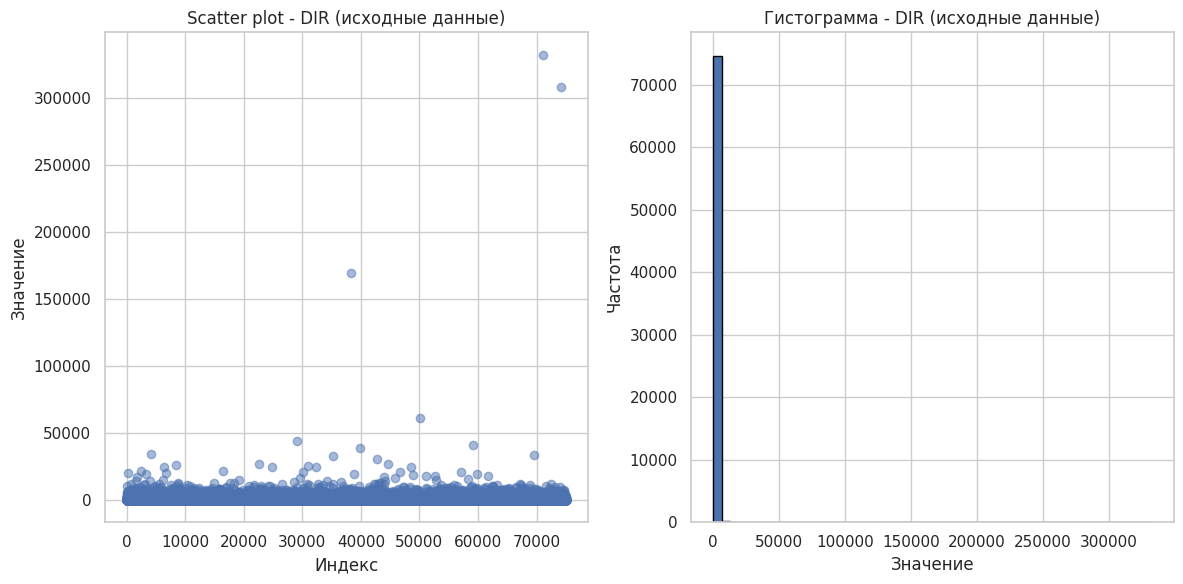

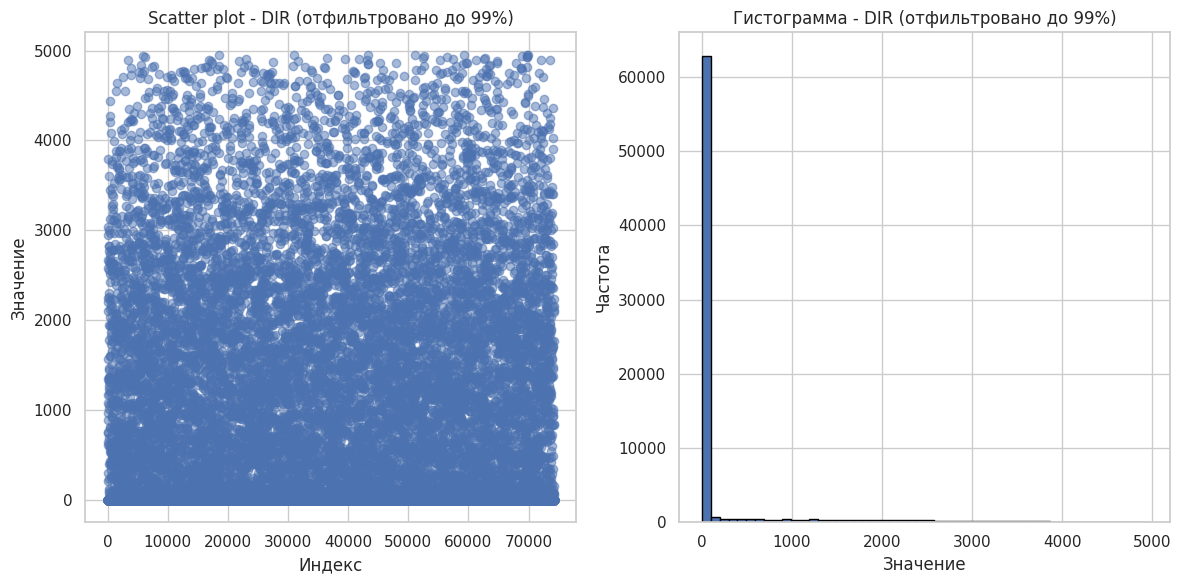


Анализ столбца: Age


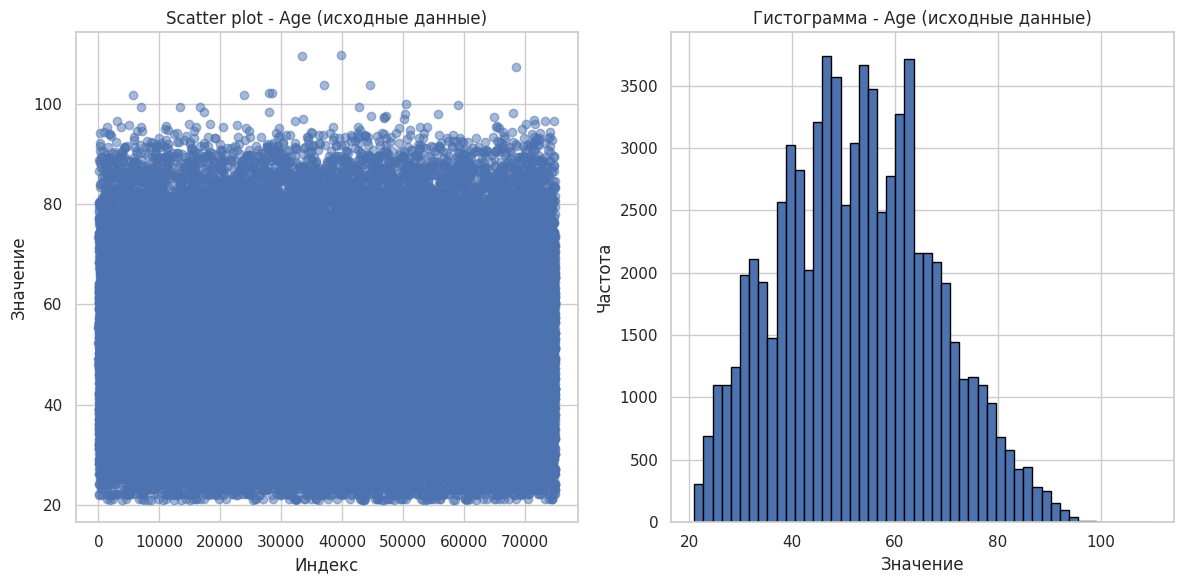

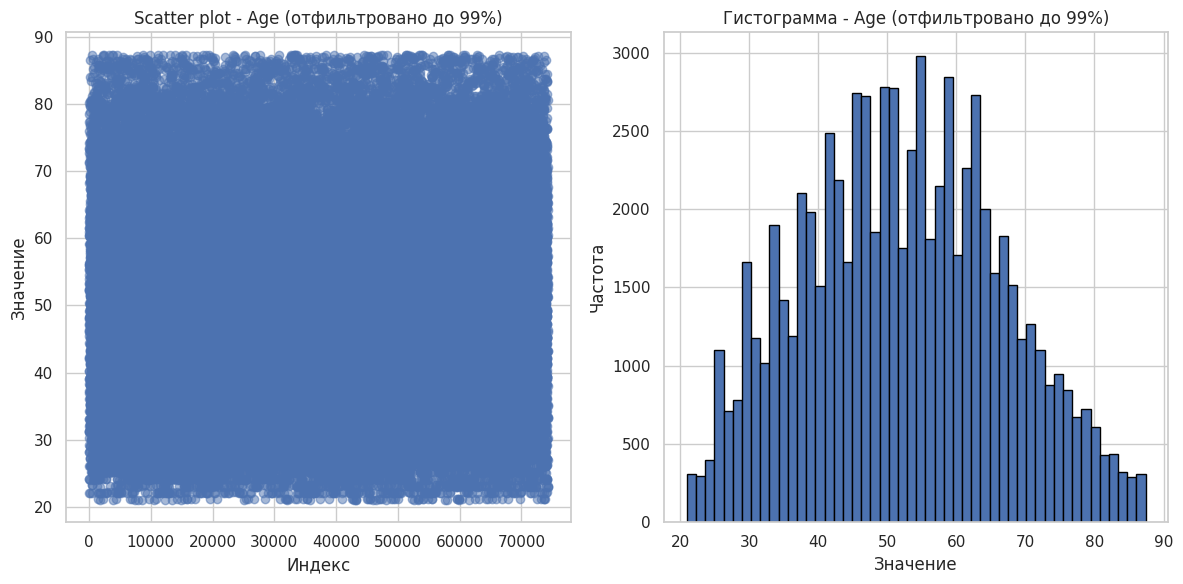


Анализ столбца: NumLoans


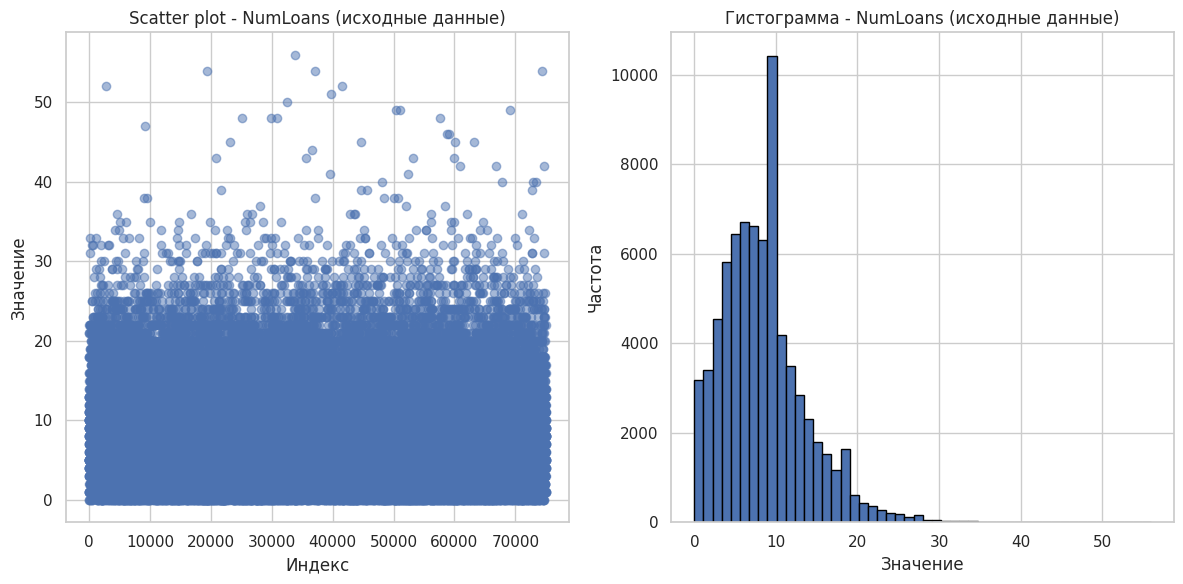

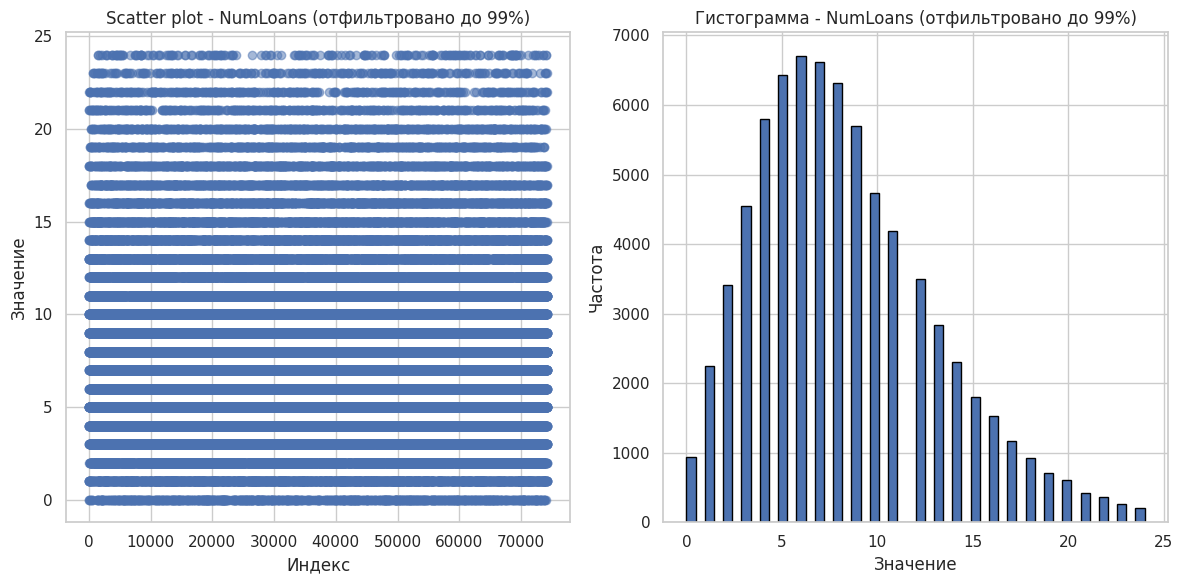


Анализ столбца: NumRealEstateLoans


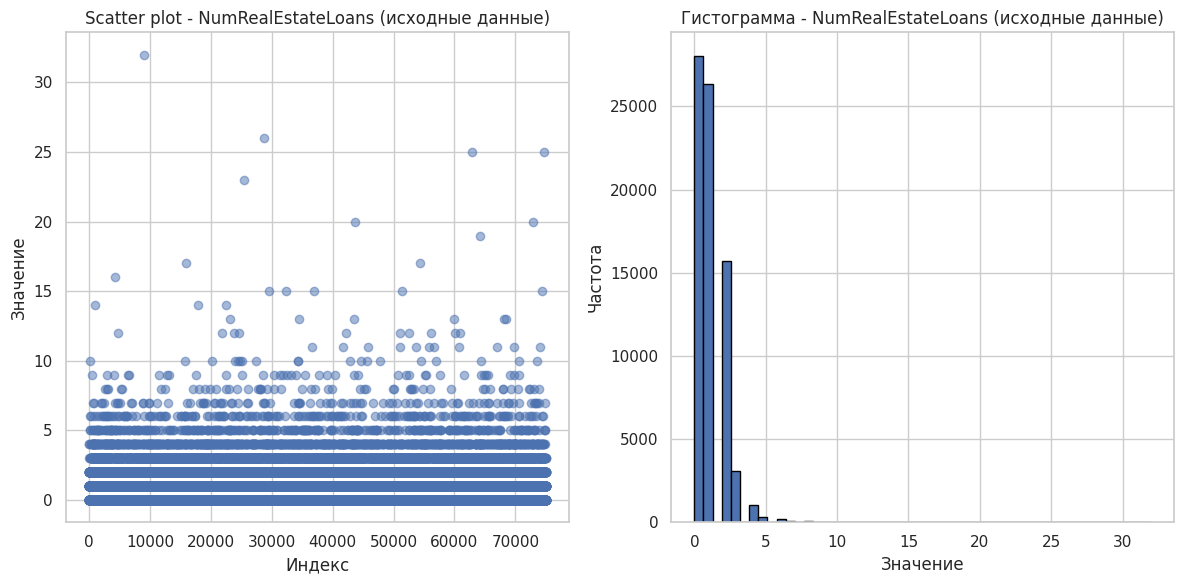

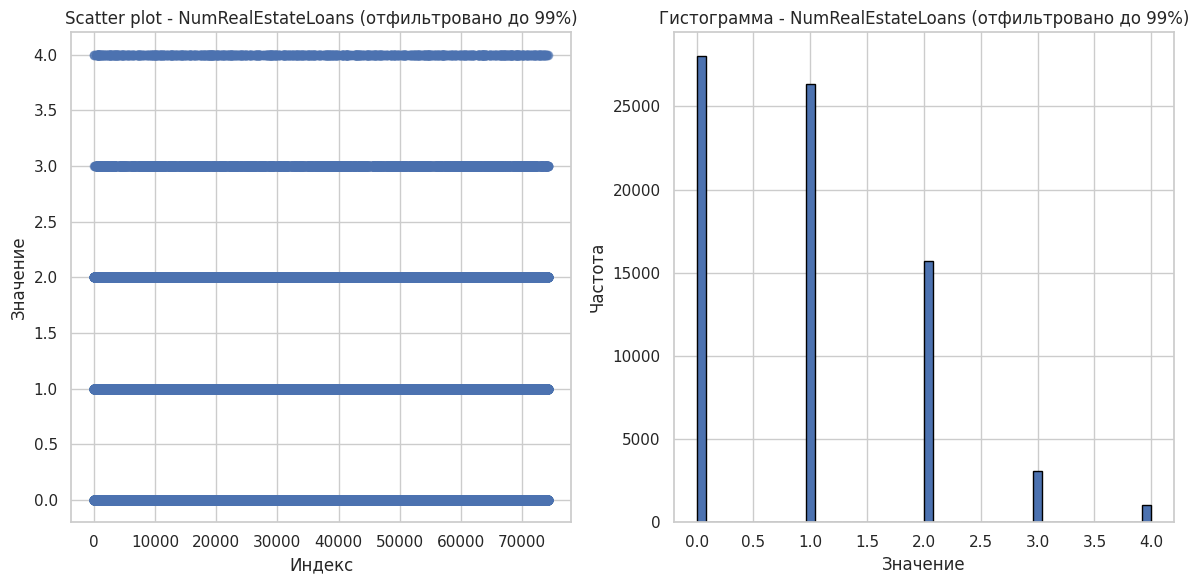


Анализ столбца: NumDependents


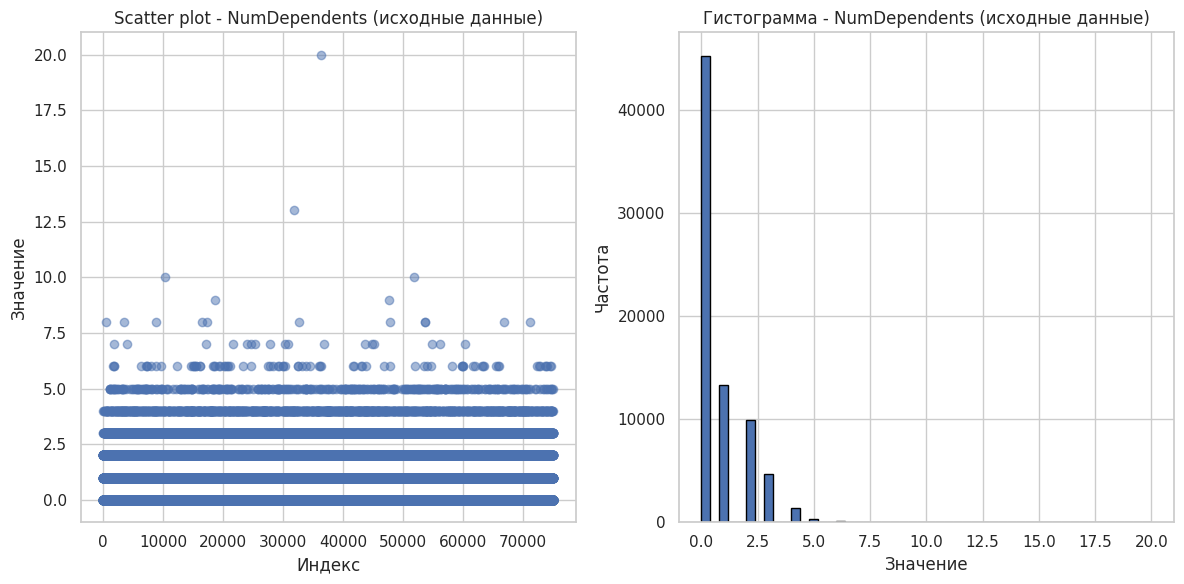

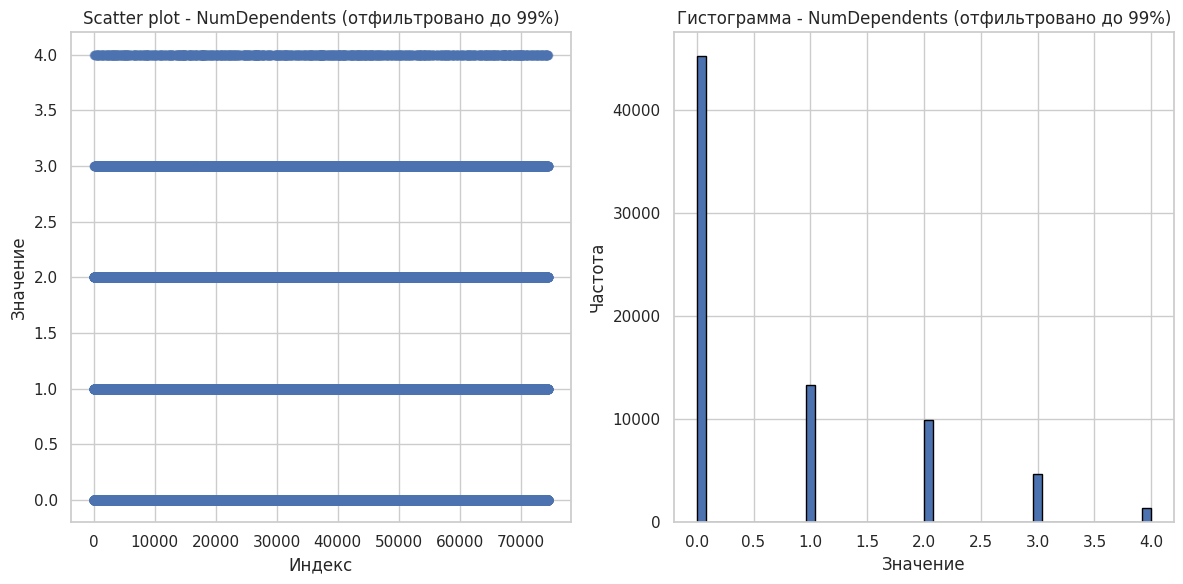


Анализ столбца: Num30-59Delinquencies


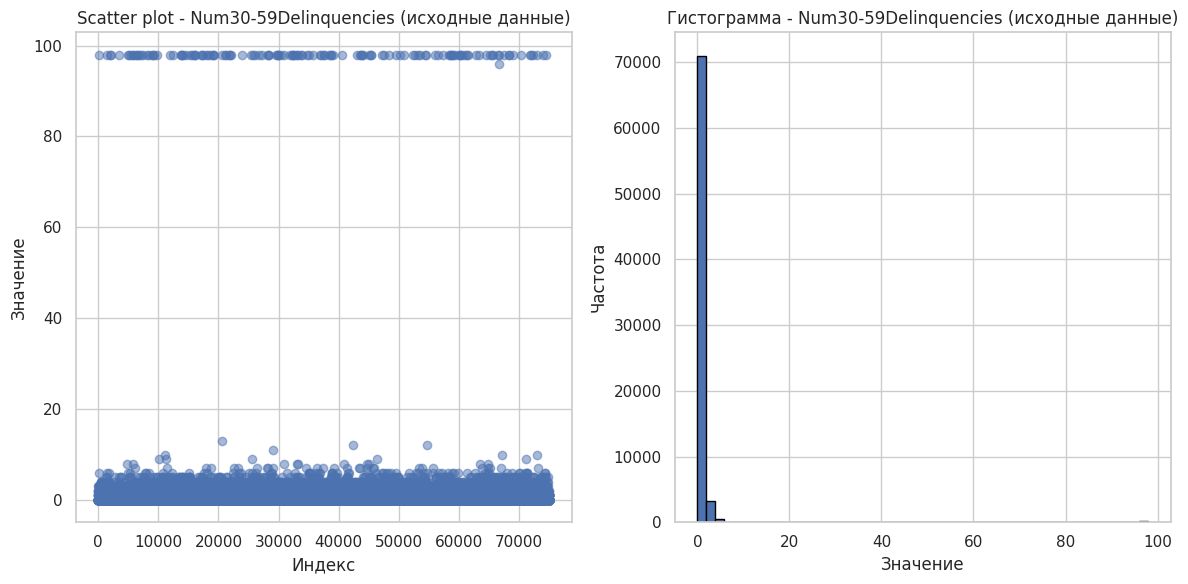

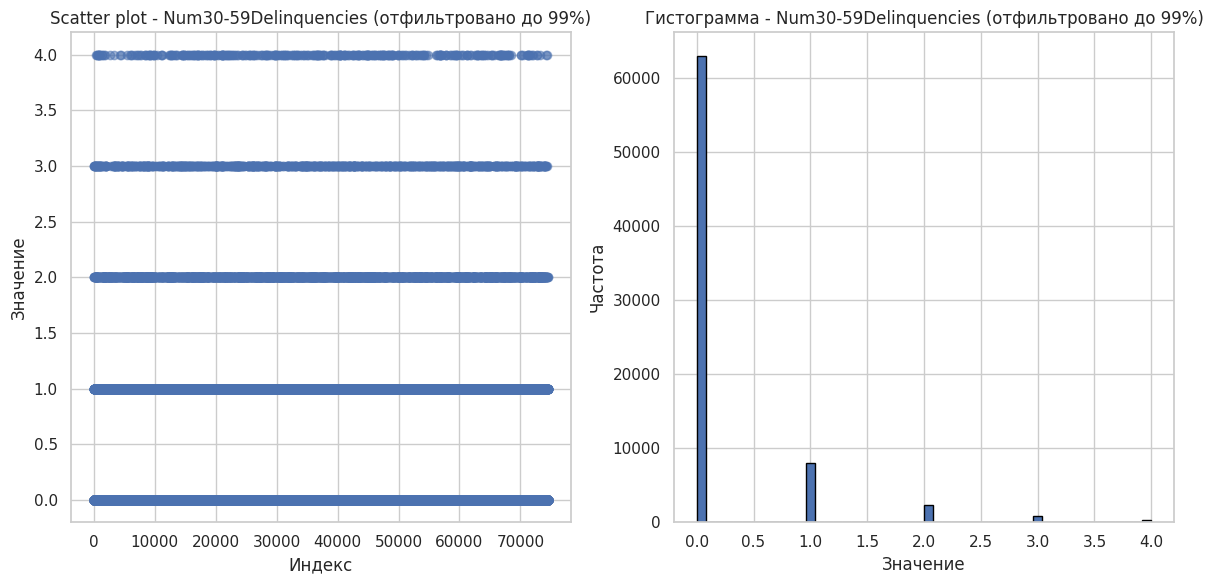


Анализ столбца: Num60-89Delinquencies


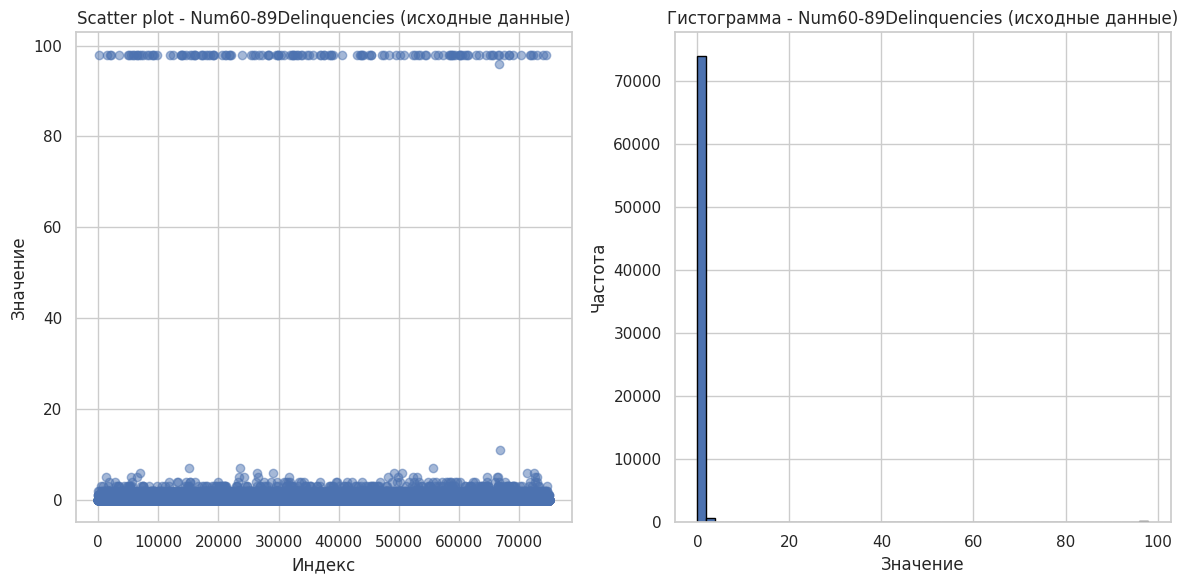

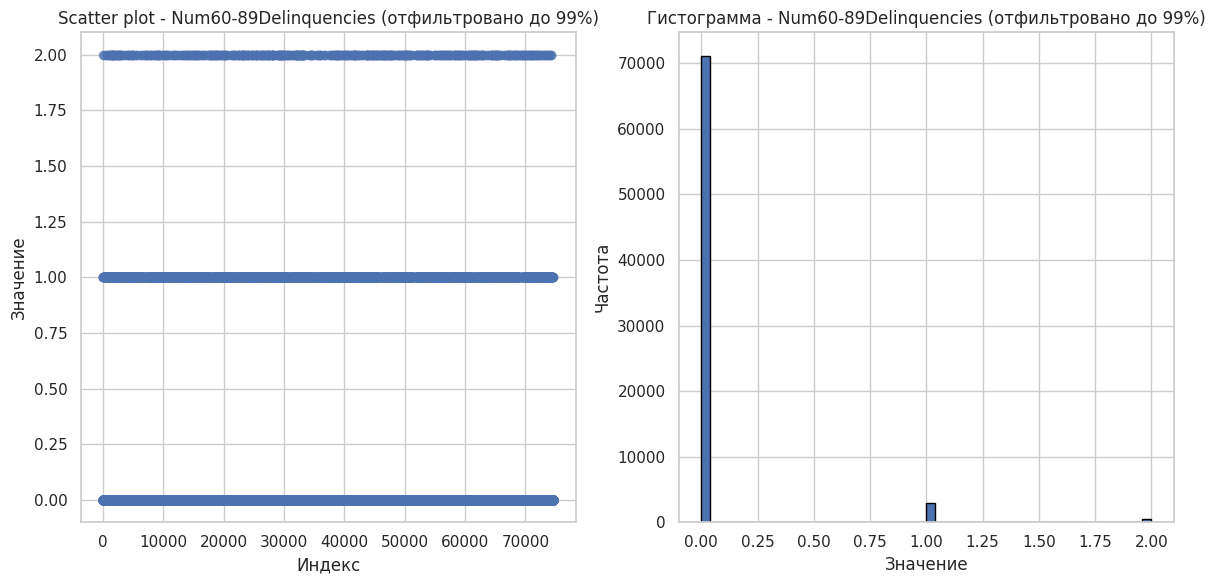


Анализ столбца: Income


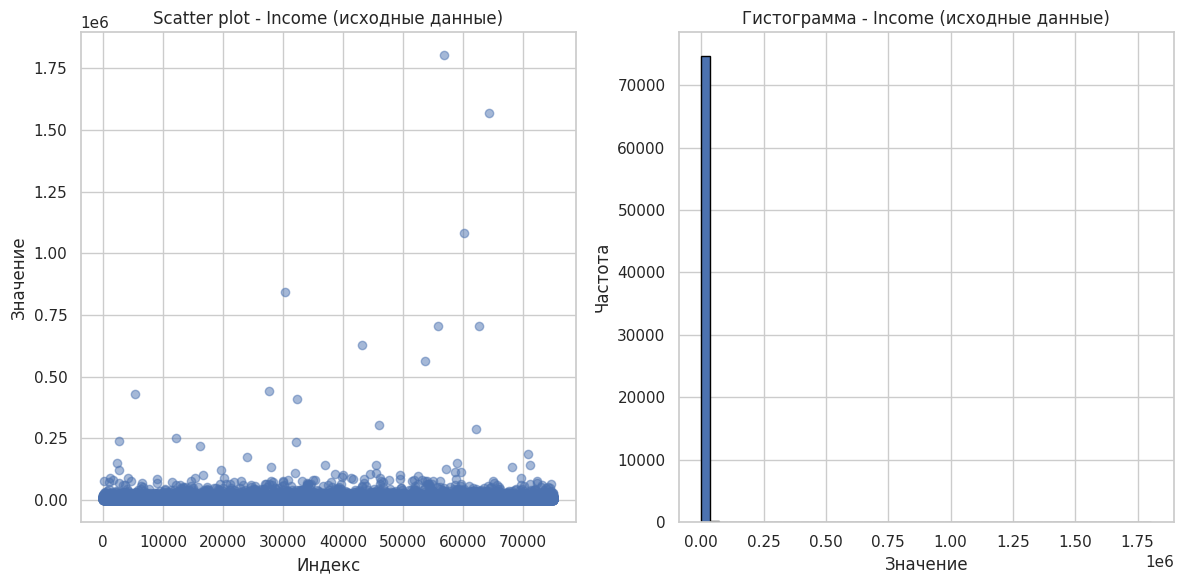

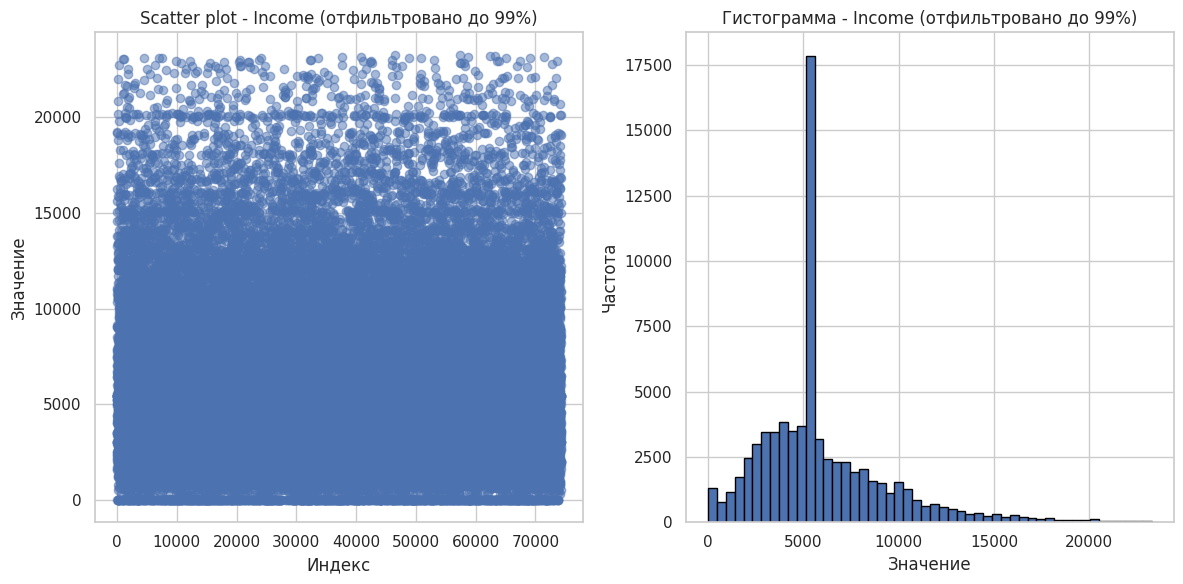


Анализ столбца: BalanceToCreditLimit


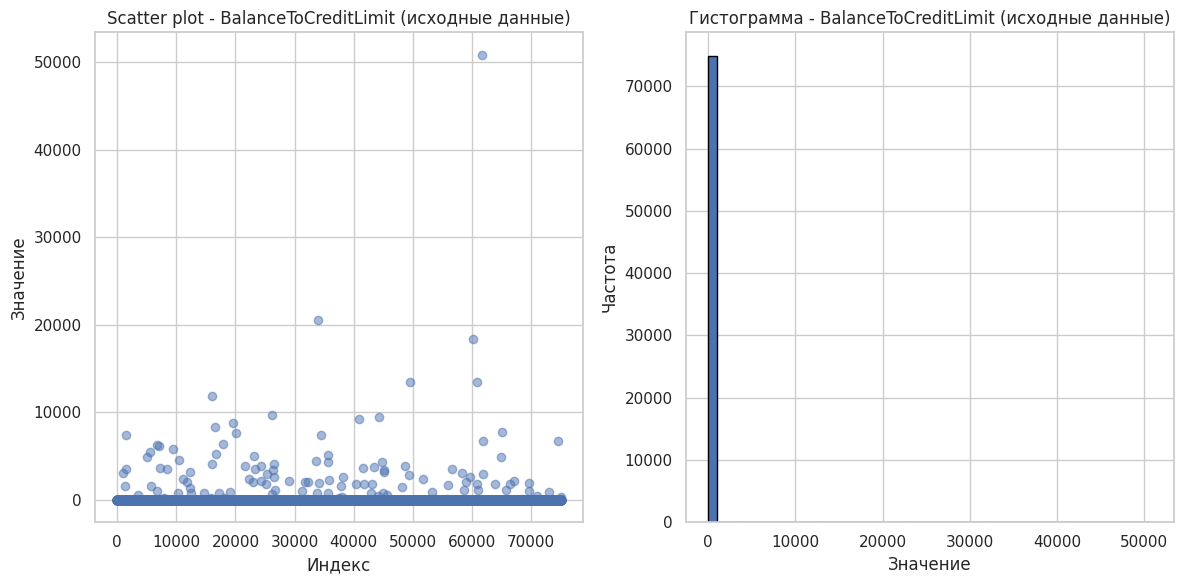

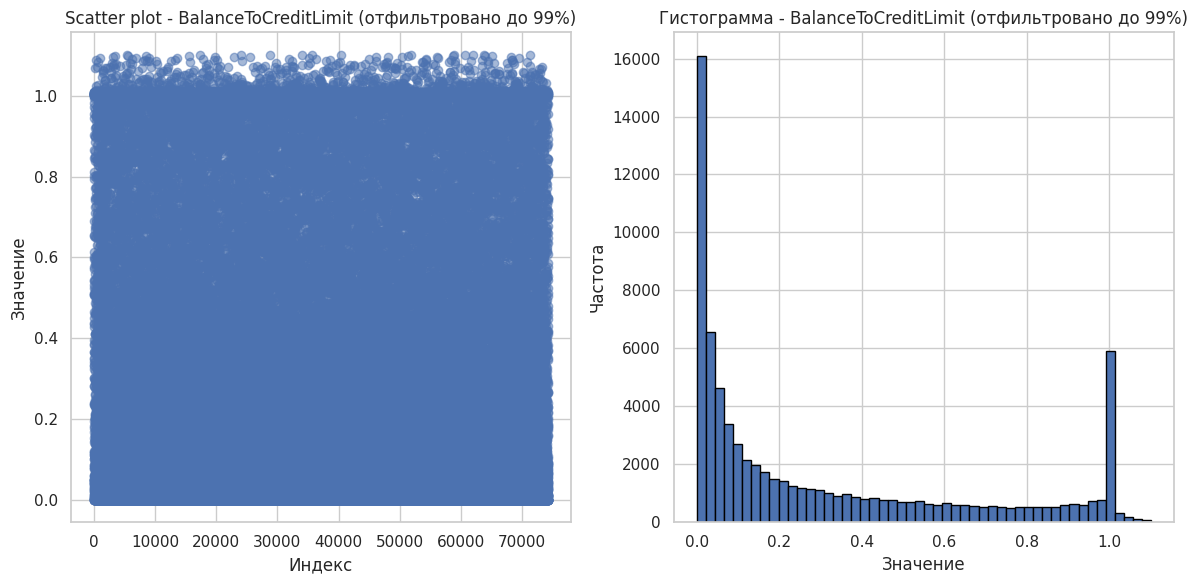


Анализ столбца: Delinquent90


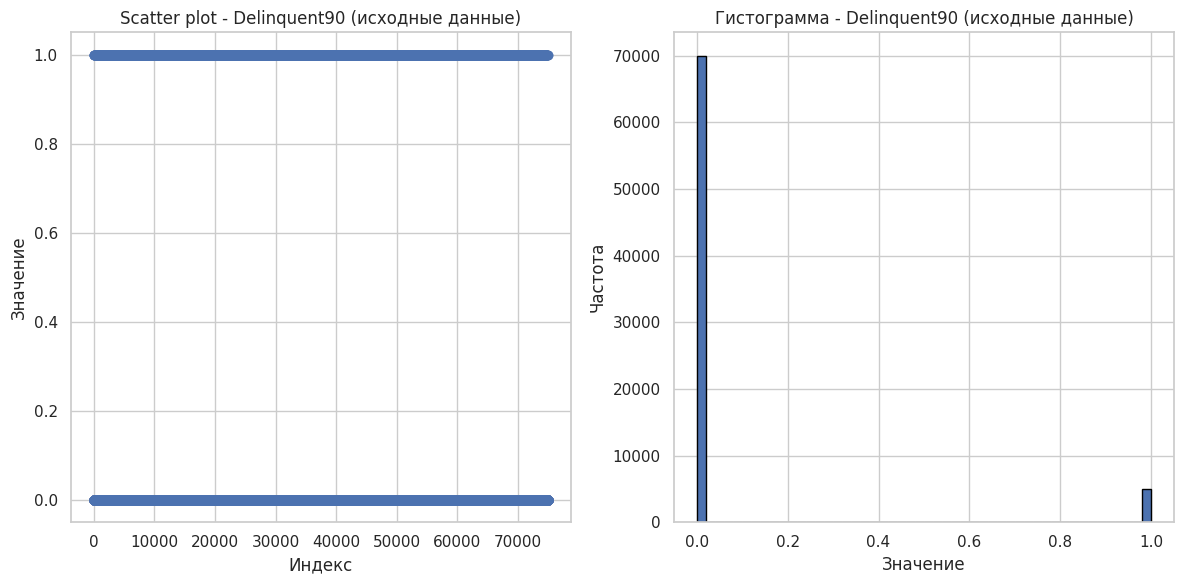

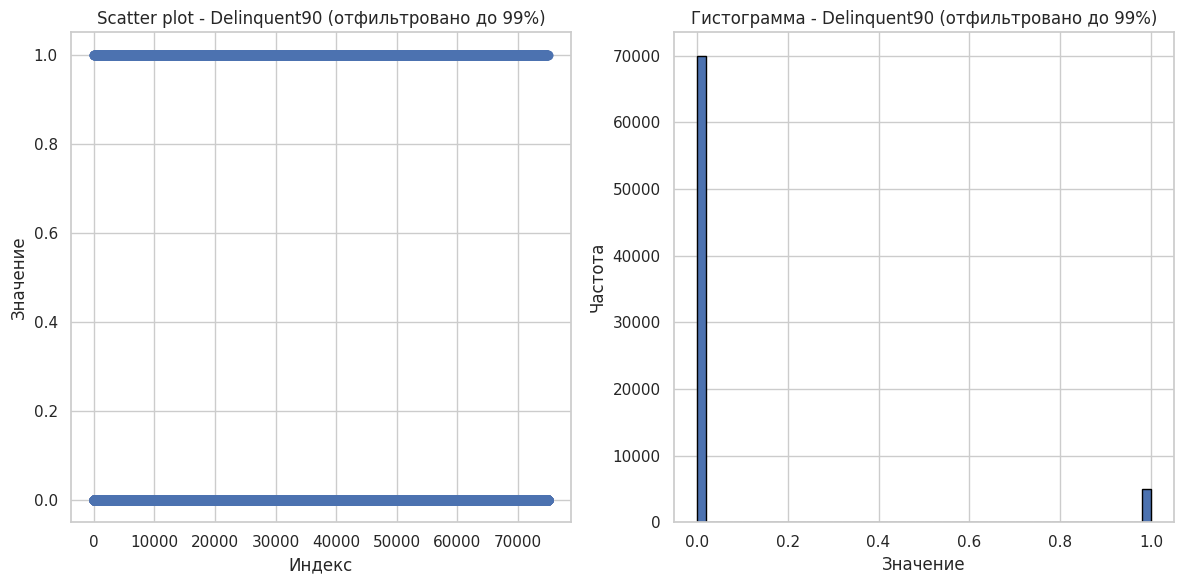

In [394]:
import matplotlib.pyplot as plt
import pandas as pd

# Функция для построения графиков
def plot_distribution(column, threshold):
    plt.figure(figsize=(12, 6))
    
    # Исходные данные
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(df)), df[column], alpha=0.5)
    plt.title(f'Scatter plot - {column} (исходные данные)')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.hist(df[column], bins=50, edgecolor='black')
    plt.title(f'Гистограмма - {column} (исходные данные)')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    plt.tight_layout()
    plt.show()
    
    # Вычисляем порог по 99-му перцентилю
    threshold = df[column].quantile(0.99)
    
    # Фильтрация данных
    filtered_df = df[df[column] <= threshold]
    
    # Отфильтрованные данные
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(filtered_df)), filtered_df[column], alpha=0.5)
    plt.title(f'Scatter plot - {column} (отфильтровано до 99%)')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.hist(filtered_df[column], bins=50, edgecolor='black')
    plt.title(f'Гистограмма - {column} (отфильтровано до 99%)')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    plt.tight_layout()
    plt.show()

# Цикл по всем числовым столбцам
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nАнализ столбца: {column}")
    
    # Вычисляем порог фильтрации как 99-й перцентиль
    threshold = df[column].quantile(0.99)
    
    plot_distribution(column, threshold)


In [395]:
len(df)

75000

In [396]:
df.describe()

DIR           Age     NumLoans  NumRealEstateLoans  \
count   75000.000000  75000.000000  75000.00000        75000.000000   
mean      353.260293     52.595605      8.44976            1.016693   
std      2117.237432     14.869729      5.15644            1.124019   
min         0.000000     21.000000      0.00000            0.000000   
25%         0.176022     41.300000      5.00000            0.000000   
50%         0.366848     52.200000      8.00000            1.000000   
75%         0.862650     63.100000     11.00000            2.000000   
max    332600.272820    109.800000     56.00000           32.000000   

       NumDependents  Num30-59Delinquencies  Num60-89Delinquencies  \
count   75000.000000           75000.000000           75000.000000   
mean        0.736653               0.428320               0.248000   
std         1.100357               4.276439               4.239486   
min         0.000000               0.000000               0.000000   
25%         0.000000               0.000000               0.000000   
50%         0.000000               0.000000               0.000000   
75%         1.000000               0.000000               0.000000   
max        20.000000              98.000000              98.000000   

             Income  BalanceToCreditLimit  Delinquent90  
count  7.500000e+04          75000.000000  75000.000000  
mean   6.479642e+03              6.276196      0.066840  
std    1.275356e+04            267.743321      0.249746  
min    0.000000e+00              0.000000      0.000000  
25%    3.948961e+03              0.029703      0.000000  
50%    5.424552e+03              0.153720      0.000000  
75%    7.406509e+03              0.560638      0.000000  
max    1.805573e+06          50873.874533      1.000000

In [397]:
X_few_features = df.drop(columns=['Delinquent90'])

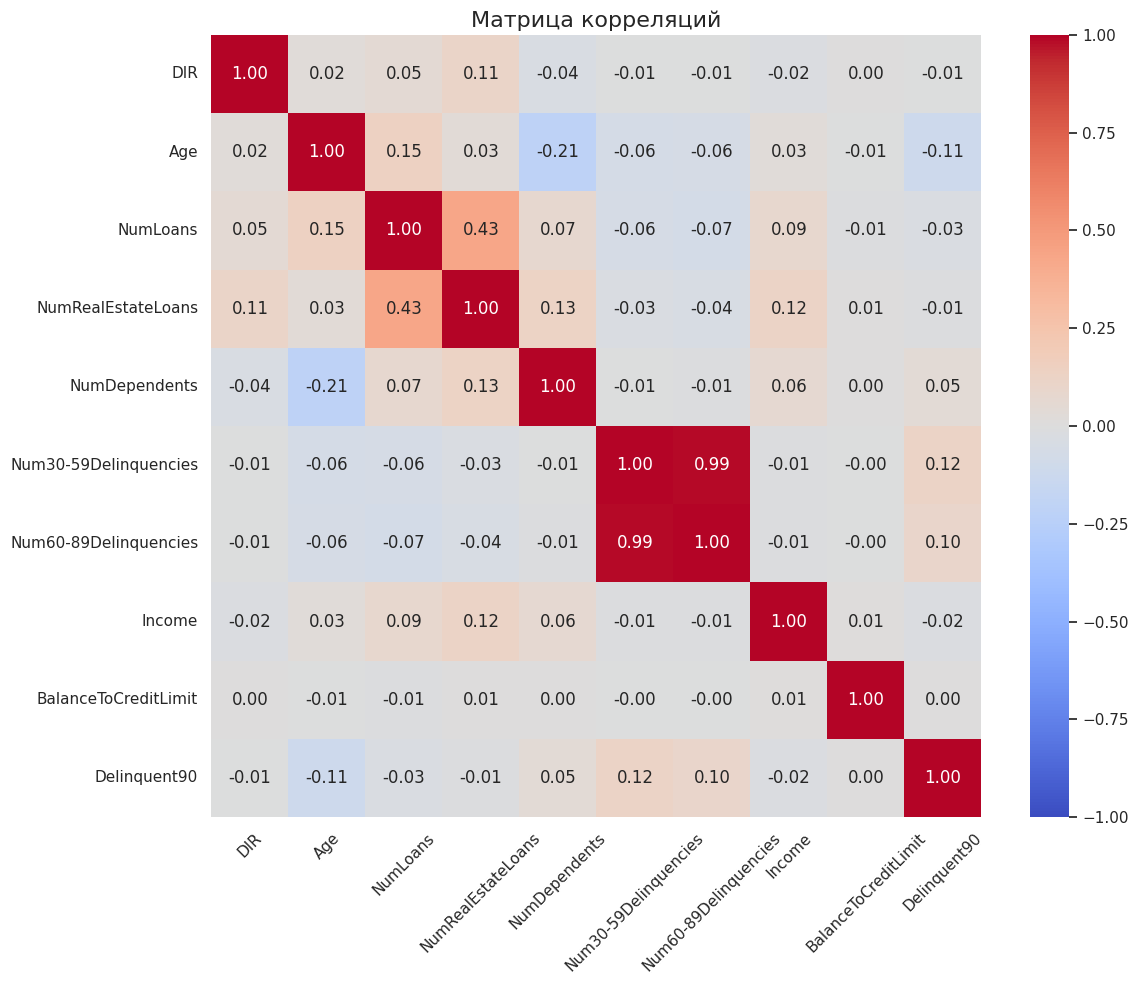

In [398]:
# Вычисляем матрицу корреляций
corr_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,        # показывать значения корреляции
    cmap='coolwarm',   # цветовая схема
    fmt=".2f",         # формат чисел
    vmin=-1,           # минимальное значение
    vmax=1,            # максимальное значение
    cbar=True          # шкала справа
)
plt.title('Матрица корреляций', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [399]:
corr_matrix.round(3)

DIR    Age  NumLoans  NumRealEstateLoans  \
DIR                    1.000  0.024     0.050               0.114   
Age                    0.024  1.000     0.147               0.033   
NumLoans               0.050  0.147     1.000               0.433   
NumRealEstateLoans     0.114  0.033     0.433               1.000   
NumDependents         -0.038 -0.215     0.072               0.130   
Num30-59Delinquencies -0.006 -0.063    -0.057              -0.031   
Num60-89Delinquencies -0.007 -0.057    -0.072              -0.041   
Income                -0.018  0.028     0.086               0.122   
BalanceToCreditLimit   0.004 -0.005    -0.014               0.006   
Delinquent90          -0.006 -0.114    -0.029              -0.010   

                       NumDependents  Num30-59Delinquencies  \
DIR                           -0.038                 -0.006   
Age                           -0.215                 -0.063   
NumLoans                       0.072                 -0.057   
NumRealEstateLoans             0.130                 -0.031   
NumDependents                  1.000                 -0.007   
Num30-59Delinquencies         -0.007                  1.000   
Num60-89Delinquencies         -0.015                  0.987   
Income                         0.064                 -0.009   
BalanceToCreditLimit           0.004                 -0.001   
Delinquent90                   0.046                  0.121   

                       Num60-89Delinquencies  Income  BalanceToCreditLimit  \
DIR                                   -0.007  -0.018                 0.004   
Age                                   -0.057   0.028                -0.005   
NumLoans                              -0.072   0.086                -0.014   
NumRealEstateLoans                    -0.041   0.122                 0.006   
NumDependents                         -0.015   0.064                 0.004   
Num30-59Delinquencies                  0.987  -0.009                -0.001   
Num60-89Delinquencies                  1.000  -0.010                -0.001   
Income                                -0.010   1.000                 0.008   
BalanceToCreditLimit                  -0.001   0.008                 1.000   
Delinquent90                           0.098  -0.019                 0.001   

                       Delinquent90  
DIR                          -0.006  
Age                          -0.114  
NumLoans                     -0.029  
NumRealEstateLoans           -0.010  
NumDependents                 0.046  
Num30-59Delinquencies         0.121  
Num60-89Delinquencies         0.098  
Income                       -0.019  
BalanceToCreditLimit          0.001  
Delinquent90                  1.000

Тут создаем новые признаки которые могут быть репрезентативными

| Новый признак          | Формула / способ расчёта                                | Что показывает / смысл                                                               |
| ---------------------- | ------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| `DebtBurden`           | `(BalanceToCreditLimit * NumLoans) / Income`            | Отношение долговой нагрузки к доходу; чем выше, тем больше финансовая нагрузка       |
| `DIR_per_Loan`         | `DIR / NumLoans`                                        | Средняя просрочка по каждому кредиту                                                 |
| `TotalDelinquencies`   | `Num30-59Delinquencies + Num60-89Delinquencies`         | Общее количество задолженностей за 30–89 дней                                        |
| `DelinquencyRate`      | `TotalDelinquencies / NumLoans`                         | Доля просрочек относительно общего числа кредитов                                    |
| `Income_per_Dependent` | `Income / (NumDependents + 1)`                          | Доход на одного иждивенца                                                            |
| `Age_Dependent_Ratio`  | `Age / (NumDependents + 1)`                             | Соотношение возраста к числу иждивенцев                                              |
| `RealEstate_Ratio`     | `NumRealEstateLoans / NumLoans`                         | Доля кредитов на недвижимость от общего числа кредитов                               |
| `Loan_Volume_encoded`  | Преобразованная категориальная переменная `Loan_Volume` | Категория по числу кредитов: Single, Few, Many, VeryMany (закодирована числом)       |
| `CreditRiskIndex`      | `(DIR + BalanceToCreditLimit) * DelinquencyRate`        | Индекс кредитного риска с учётом просрочек и долговой нагрузки                       |
| `FinancialStability`   | `Income / (BalanceToCreditLimit * NumLoans)`            | Показатель финансовой устойчивости; чем выше, тем выше способность обслуживать долги |


Потом с помощью pca сократим количество признаков

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['DebtBurden'] = (df['BalanceToCreditLimit'] * df['NumLoans']) / df['Income'].replace(0, np.nan)
df['DIR_per_Loan'] = df['DIR'] / df['NumLoans'].replace(0, np.nan)

df['TotalDelinquencies'] = df['Num30-59Delinquencies'] + df['Num60-89Delinquencies']
df['DelinquencyRate'] = df['TotalDelinquencies'] / df['NumLoans'].replace(0, np.nan)

df['Income_per_Dependent'] = df['Income'] / (df['NumDependents'] + 1)
df['Age_Dependent_Ratio'] = df['Age'] / (df['NumDependents'] + 1)

df['RealEstate_Ratio'] = df['NumRealEstateLoans'] / df['NumLoans'].replace(0, np.nan)

# Категоризация количества кредитов
df['Loan_Volume'] = pd.cut(df['NumLoans'], 
                           bins=[0, 1, 3, 5, np.inf], 
                           labels=['Single', 'Few', 'Many', 'VeryMany'])

# Кодирование
le = LabelEncoder()
df['Loan_Volume_encoded'] = le.fit_transform(df['Loan_Volume'])

df = df.drop(columns=['Loan_Volume'])

# Индексы
df['CreditRiskIndex'] = (df['DIR'] + df['BalanceToCreditLimit']) * df['DelinquencyRate'].fillna(0)
df['FinancialStability'] = df['Income'] / (
    (df['BalanceToCreditLimit'].replace(0, np.nan)) * df['NumLoans'].replace(0, np.nan)
)

# Заменим inf/NaN на медианные значения
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)


In [401]:
df['Delinquent90'].describe()

count    75000.000000
mean         0.066840
std          0.249746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Delinquent90, dtype: float64

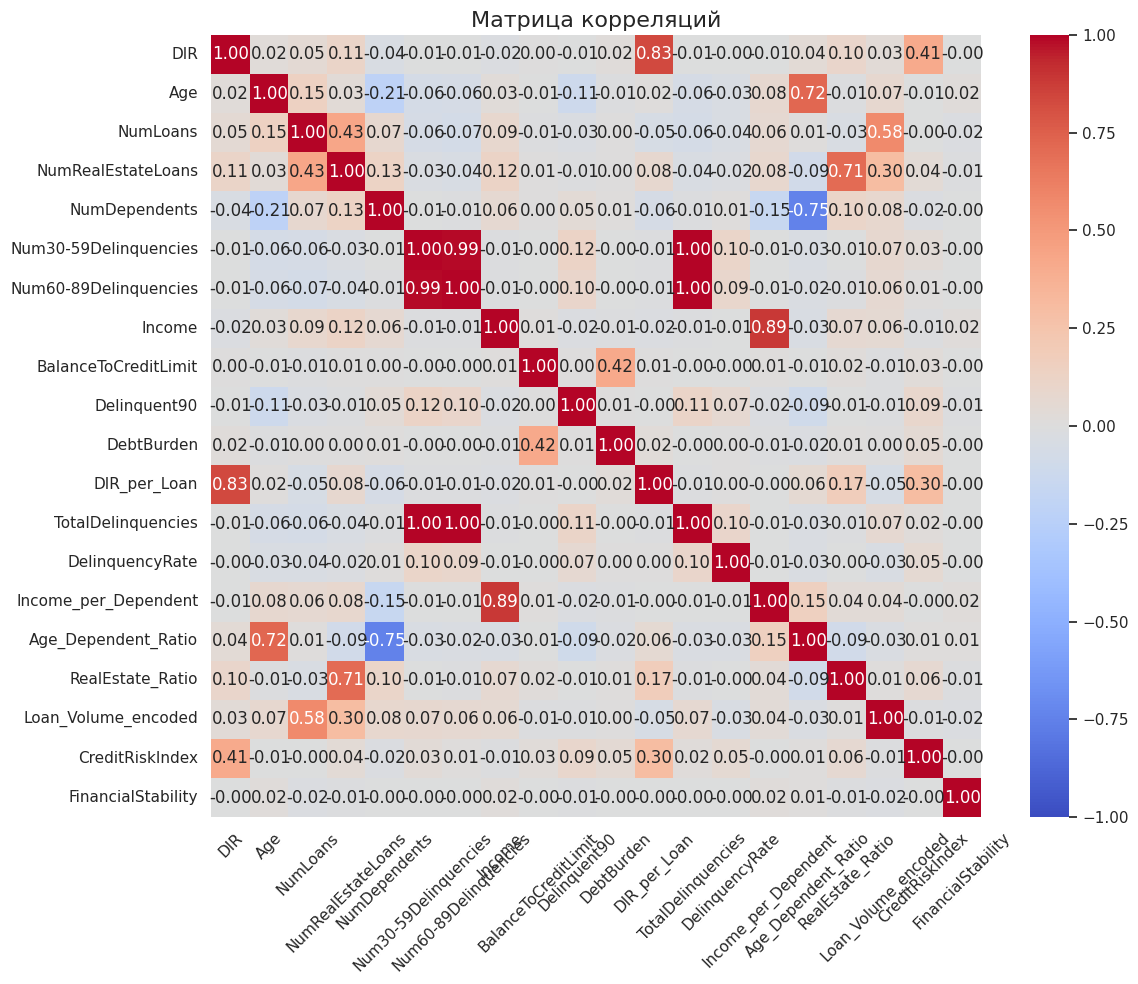

In [402]:
# Вычисляем матрицу корреляций
corr_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,        # показывать значения корреляции
    cmap='coolwarm',   # цветовая схема
    fmt=".2f",         # формат чисел
    vmin=-1,           # минимальное значение
    vmax=1,            # максимальное значение
    cbar=True          # шкала справа
)
plt.title('Матрица корреляций', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Признаки с корреляцией больше 83 все таки удалим 

In [404]:
# df — ваш исходный DataFrame
corr_matrix = df.corr().abs()  # модуль корреляции

# Верхний треугольник матрицы корреляций
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Находим признаки с корреляцией >= 0.83
to_drop = [column for column in upper.columns if any(upper[column] >= 0.83)]

print("Признаки, которые будут удалены из-за высокой корреляции:", to_drop)

# Удаляем сильно коррелированные признаки
df_reduced = df.drop(columns=to_drop)

print("Новая форма датафрейма:", df_reduced.shape)

Признаки, которые будут удалены из-за высокой корреляции: ['Num60-89Delinquencies', 'DIR_per_Loan', 'TotalDelinquencies', 'Income_per_Dependent']
Новая форма датафрейма: (75000, 16)


In [405]:
df_clean = df.copy()

X_lots_of_features = df_clean.drop(columns=['Delinquent90'])

In [406]:
df_clean.head()

DIR   Age  NumLoans  NumRealEstateLoans  NumDependents  \
0     0.496289  49.1        13                   0            0.0   
1     0.433567  48.0         9                   2            2.0   
2  2206.731199  55.5        21                   1            0.0   
3   886.132793  55.3         3                   0            0.0   
4     0.000000  52.3         1                   0            0.0   

   Num30-59Delinquencies  Num60-89Delinquencies       Income  \
0                      2                      0  5298.360639   
1                      1                      0  6008.056256   
2                      1                      0  5424.552473   
3                      0                      0  5424.552473   
4                      0                      0  2504.613105   

   BalanceToCreditLimit  Delinquent90  DebtBurden  DIR_per_Loan  \
0              0.387028             0    0.000950      0.038176   
1              0.234679             0    0.000352      0.048174   
2              0.348227             0    0.001348    105.082438   
3              0.971930             0    0.000538    295.377598   
4              1.004350             0    0.000401      0.000000   

   TotalDelinquencies  DelinquencyRate  Income_per_Dependent  \
0                   2         0.153846           5298.360639   
1                   1         0.111111           2002.685419   
2                   1         0.047619           5424.552473   
3                   0         0.000000           5424.552473   
4                   0         0.000000           2504.613105   

   Age_Dependent_Ratio  RealEstate_Ratio  Loan_Volume_encoded  \
0                 49.1          0.000000                    3   
1                 16.0          0.222222                    3   
2                 55.5          0.047619                    3   
3                 55.3          0.000000                    0   
4                 52.3          0.000000                    2   

   CreditRiskIndex  FinancialStability  
0         0.135895         1053.066453  
1         0.074250         2844.574104  
2       105.099020          741.792057  
3         0.000000         1860.405747  
4         0.000000         2493.765226

Сейчас у нас довольно много признаков и хочется сократить их пространство и выделить главные
это можно сделать с помощью PCA

In [407]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DIR                    75000 non-null  float64
 1   Age                    75000 non-null  float64
 2   NumLoans               75000 non-null  int64  
 3   NumRealEstateLoans     75000 non-null  int64  
 4   NumDependents          75000 non-null  float64
 5   Num30-59Delinquencies  75000 non-null  int64  
 6   Num60-89Delinquencies  75000 non-null  int64  
 7   Income                 75000 non-null  float64
 8   BalanceToCreditLimit   75000 non-null  float64
 9   Delinquent90           75000 non-null  int64  
 10  DebtBurden             75000 non-null  float64
 11  DIR_per_Loan           75000 non-null  float64
 12  TotalDelinquencies     75000 non-null  int64  
 13  DelinquencyRate        75000 non-null  float64
 14  Income_per_Dependent   75000 non-null  float64
 15  Ag

Возьмем 99% процентов дисперсии, много конечно, но так мы точно ничего не потеряем.

Число компонент для 99% дисперсии: 15
Суммарная объяснённая дисперсия: 0.991


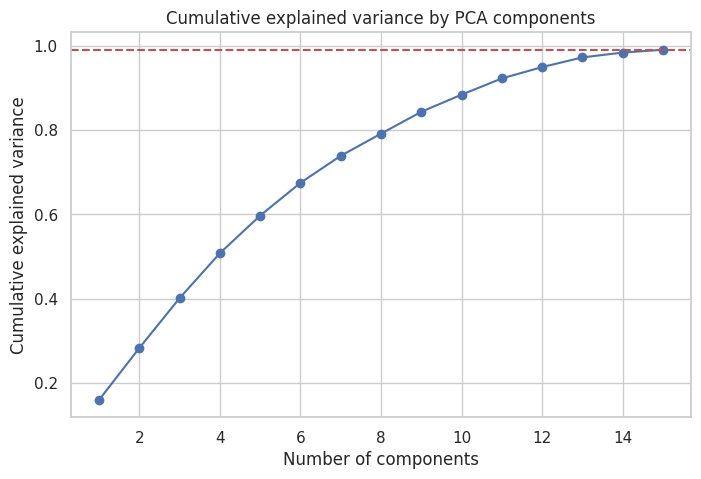

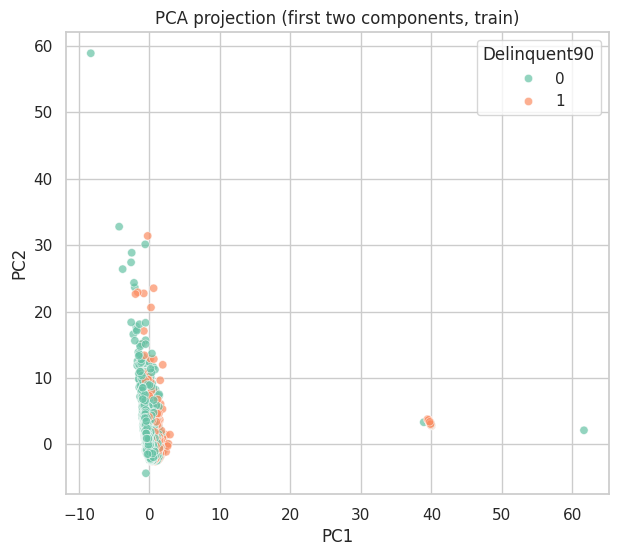

In [408]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Целевая переменная
y = df['Delinquent90']

# Признаки (только числовые)
X = df.drop(columns=['Delinquent90'])

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Масштабирование ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # применяем к тесту

# --- PCA до 99% объяснённой дисперсии ---
pca = PCA(n_components=0.99, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # применяем к тесту

print(f"Число компонент для 99% дисперсии: {pca.n_components_}")
print(f"Суммарная объяснённая дисперсия: {pca.explained_variance_ratio_.sum():.3f}")

# --- Визуализация кумулятивной дисперсии ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(0.99, color='r', linestyle='--')
plt.title('Cumulative explained variance by PCA components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# --- Визуализация первых двух компонент на train ---
pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Delinquent90'] = y_train.values

plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Delinquent90', palette='Set2', alpha=0.7)
plt.title('PCA projection (first two components, train)')
plt.show()


Далее преобразуем массивы полученные с помощбю pca в датафреймы

In [409]:
# Создаём имена компонент
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]

# Преобразуем массивы в DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=X_test.index)


Тут выведем из чего состоят новые признаки что бы потом интерпретировать важность признаков pca

Топ-4 исходных признака для каждой PCA-компоненты:

PC1:
   + TotalDelinquencies        | вклад = 0.569
   + Num30-59Delinquencies     | вклад = 0.567
   + Num60-89Delinquencies     | вклад = 0.567
   + DelinquencyRate           | вклад = 0.097

PC2:
   + NumRealEstateLoans        | вклад = 0.456
   + DIR                       | вклад = 0.436
   + DIR_per_Loan              | вклад = 0.392
   + RealEstate_Ratio          | вклад = 0.379

PC3:
   + Age_Dependent_Ratio       | вклад = 0.614
   - NumDependents             | вклад = 0.524
   + Age                       | вклад = 0.424
   - NumRealEstateLoans        | вклад = 0.252

PC4:
   + Income                    | вклад = 0.473
   + Income_per_Dependent      | вклад = 0.464
   - DIR_per_Loan              | вклад = 0.402
   - DIR                       | вклад = 0.352

PC5:
   + Income                    | вклад = 0.485
   + Income_per_Dependent      | вклад = 0.478
   - NumLoans                  | вклад = 0.413
   - Loan_Volume_encoded  

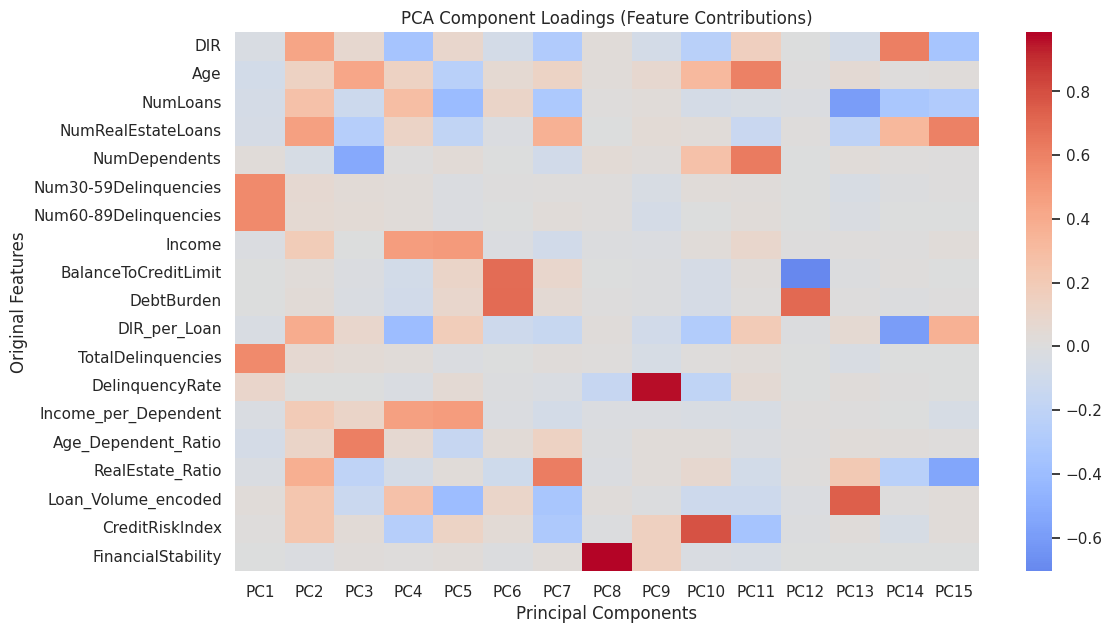

In [410]:
loadings = pd.DataFrame(
    pca.components_.T,           # транспонируем, чтобы строки = признаки
    columns=pca_columns,         # столбцы = PC1, PC2, ...
    index=X.columns              # строки = исходные признаки
)

# === Автоматическая расшифровка компонент ===
print("Топ-4 исходных признака для каждой PCA-компоненты:\n")
for pc in pca_columns:
    top_features = loadings[pc].abs().sort_values(ascending=False).head(4)
    signs = loadings.loc[top_features.index, pc].apply(lambda x: '+' if x > 0 else '-')
    print(f"{pc}:")
    for feat, sign, val in zip(top_features.index, signs, top_features.values):
        print(f"   {sign} {feat:25s} | вклад = {val:.3f}")
    print()

# === Визуализация всех компонент ===
plt.figure(figsize=(12,7))
sns.heatmap(loadings, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings (Feature Contributions)')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

In [411]:
X_test = X_test_pca_df
X_train = X_train_pca_df

In [412]:
X_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
4906  -0.619477  6.282226 -2.356230 -2.403284 -0.070846 -1.050861  1.288606   
65420  0.074548 -0.533995 -2.348839  0.182857 -0.195485  0.029788 -0.683791   
309   -0.017164  3.263000 -2.443961 -2.335795  0.326848 -0.320331 -2.461009   
32034 -0.152390  0.531798 -2.450212  1.095053 -0.871617  0.202491 -0.744716   
48962 -0.269863 -0.330320  1.951866  1.055703 -0.476222  0.321770 -0.714408   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
4906   0.072264 -0.417917 -1.881522  0.062071  0.009599 -0.357374  1.699842   
65420  0.055229 -0.060478  0.310466  0.810489 -0.036390  0.241490 -0.063070   
309    0.205373  0.062526  1.248393  1.673599 -0.080755 -0.283134  0.980088   
32034  0.073733  0.071555  0.443261  1.002584 -0.040467 -0.809945 -0.287726   
48962 -0.013871  0.012785  0.128290  0.307992 -0.020857  0.349361 -0.151497   

           PC15  
4906   0.326490  
65420  0.013802  
309   -0.291831  
32034  0.090145  
48962 -0.113682

In [413]:
df_corr = X_train.copy()
df_corr['Delinquent90'] = y_train.values

После применения PCA можно увидеть что признаки между собой не коррелируют

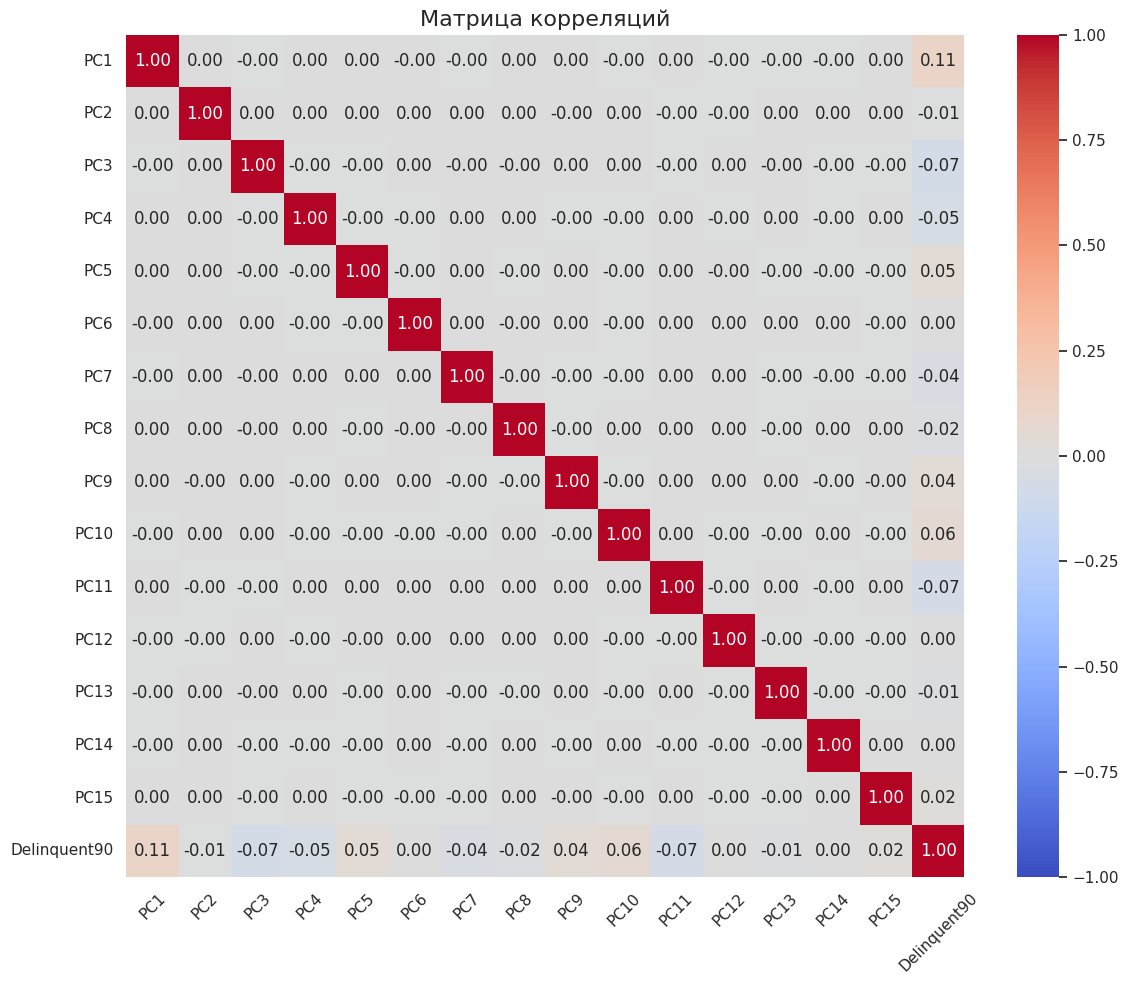

In [414]:
df_corr.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(
    df_corr.corr(),
    annot=True,        # показывать значения корреляции
    cmap='coolwarm',   # цветовая схема
    fmt=".2f",         # формат чисел
    vmin=-1,           # минимальное значение
    vmax=1,            # максимальное значение
    cbar=True          # шкала справа
)
plt.title('Матрица корреляций', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Глубина дерева

Влияние на переобучение
на точность тут не оч полезно смотреть тк классы не сбалансированны, но делаем как в задание  :)

с гридсерчем выбираем лучшее по f1 по первому классу

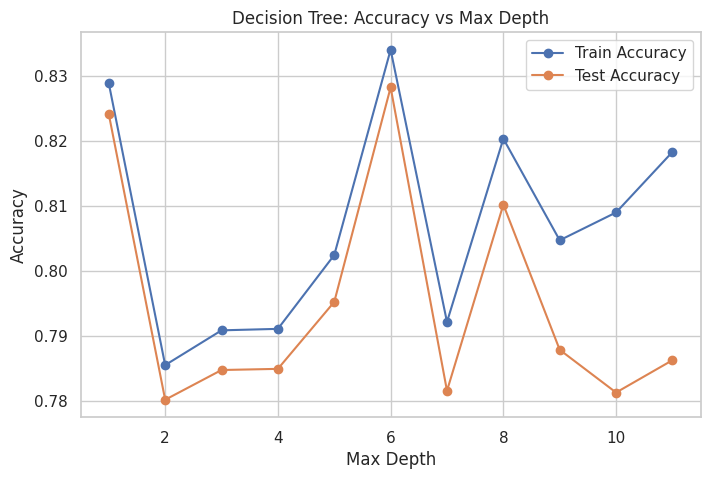

Оптимальная глубина дерева: 6


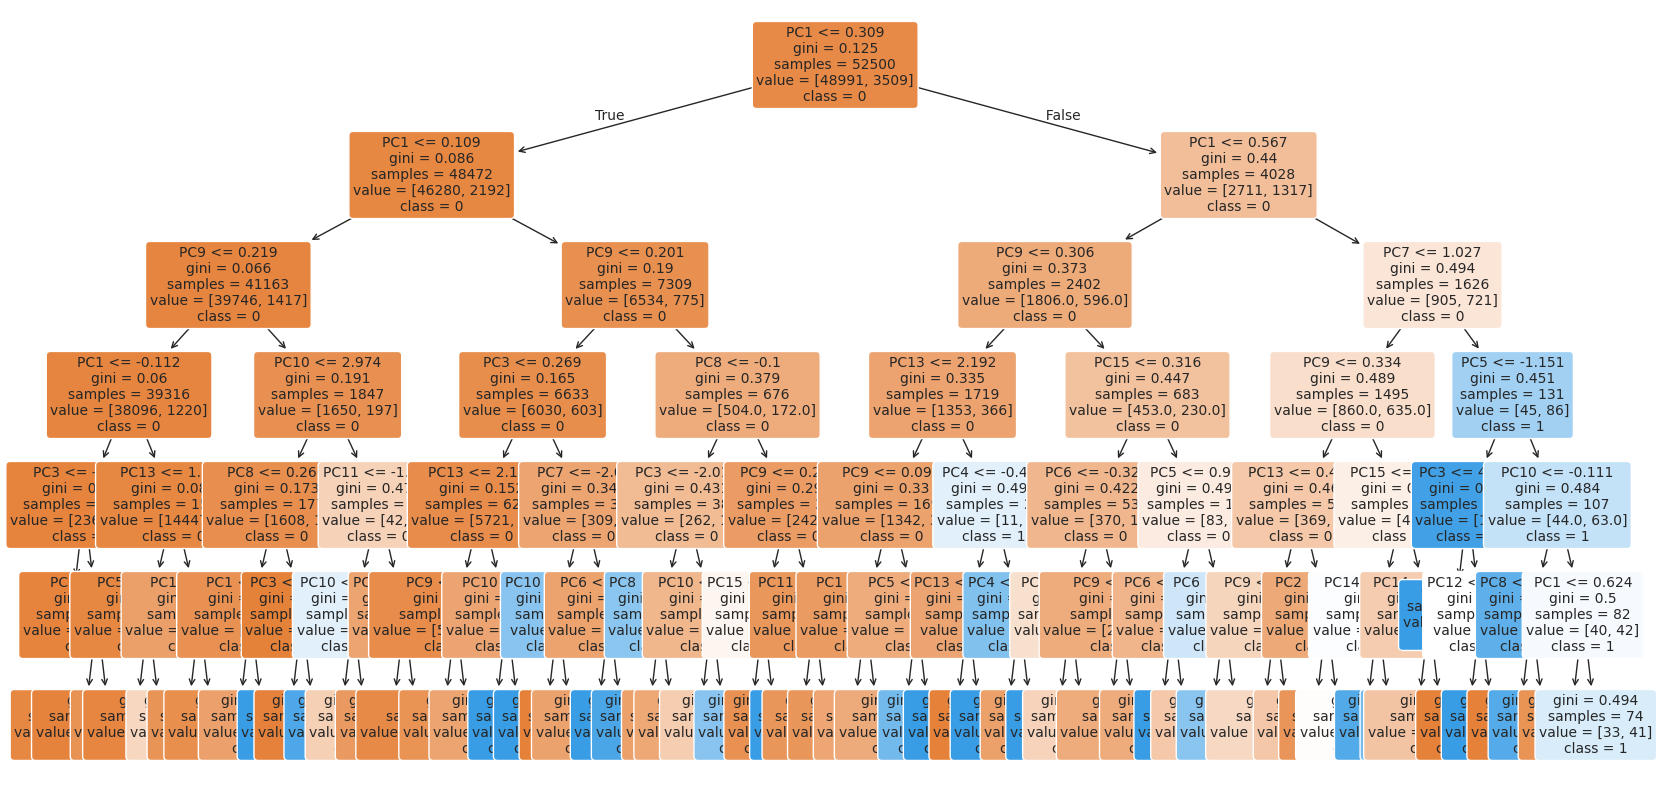

/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


=== Лучшие параметры дерева через GridSearchCV ===
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}
=== Метрики на тестовой выборке ===
Accuracy: 0.9308
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     20996
           1       0.38      0.05      0.10      1504

    accuracy                           0.93     22500
   macro avg       0.66      0.52      0.53     22500
weighted avg       0.90      0.93      0.91     22500



In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# === Исследуем влияние глубины дерева ===
max_depths = range(1, 12)
train_acc = []
test_acc = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# === График зависимости точности от глубины дерева ===
plt.figure(figsize=(8,5))
plt.plot(max_depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(max_depths, test_acc, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# === Оптимальная глубина дерева по Test Accuracy ===
best_depth = max_depths[np.argmax(test_acc)]
print(f"Оптимальная глубина дерева: {best_depth}")

# === Визуализация дерева для оптимальной глубины ===
dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_best.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    dt_best,
    feature_names=X_train.columns,        # используем все признаки из X_train
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# scorer для F1 именно класса 1
f1_pos_scorer = make_scorer(f1_score, pos_label=1)

# === Подбор оптимальных гиперпараметров через GridSearchCV ===
param_grid = {
    'max_depth': range(1, 12),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring=f1_pos_scorer,
    n_jobs=3
)

grid.fit(X_train, y_train)
best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)

print("=== Лучшие параметры дерева через GridSearchCV ===")
print(grid.best_params_)
print("=== Метрики на тестовой выборке ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


## Как целевую метрику возьмем macro avg
при обучении будем ставить class_weight='balanced' тк как классы не сбалансированны

## Бэггинг

Идея: обучаем несколько моделей на разных подвыборках данных.

Эффект: снижает дисперсию, борется с переобучением.

Гридсерч так же на f1 по 1 классу и в остальных моделях так же

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score


# --- Базовая модель ---
base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# --- Ансамбль с бэггингом ---
bagging = BaggingClassifier(
    estimator=base_model,
    random_state=42,
    n_jobs=3
)

# --- Сетка гиперпараметров ---
param_grid = {
    # параметры базовой модели (Decision Tree)
    'estimator__max_depth': [3, 5],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2],

    # параметры бэггинга
    'n_estimators': [10, 50],
    'max_samples': [0.7, 1.0],
    'max_features': [0.7, 1.0],
    'bootstrap': [True]
}

# --- GridSearchCV с F1 (weighted) ---
grid = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid,
    cv=3,
    scoring=f1_pos_scorer,
    n_jobs=3
)

# --- Обучение ---
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# --- Предсказание на тесте ---
y_pred = best_model.predict(X_test)

# --- Результаты ---
print("=== Лучшие параметры BaggingClassifier ===")
print(grid.best_params_)
print("=== Метрики на тестовой выборке ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

=== Лучшие параметры BaggingClassifier ===
{'bootstrap': True, 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}
=== Метрики на тестовой выборке ===
Accuracy: 0.8296
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     20996
           1       0.22      0.60      0.32      1504

    accuracy                           0.83     22500
   macro avg       0.59      0.72      0.61     22500
weighted avg       0.92      0.83      0.86     22500



## Стекинг

Идея: объединяем предсказания разных моделей через метамодель (второй уровень обучения).


Эффект: часто даёт наилучшую точность за счёт разнообразия моделей.

In [417]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# --- Масштабирование для KNN и логистической регрессии ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Базовые модели ---
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    ('knn', KNeighborsClassifier())
]

# --- Стекинг ---
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000, class_weight='balanced'),
    n_jobs=3,
    passthrough=True
)

# --- Сетка гиперпараметров (упрощённая) ---
param_grid = {
    # DecisionTree
    'dt__max_depth': [3, 5],
    'dt__min_samples_split': [2, 5],
    'dt__min_samples_leaf': [1, 2],
    
    # KNN
    'knn__n_neighbors': [3, 5],
    'knn__weights': ['uniform', 'distance'],
    
    # LogisticRegression (мета-модель)
    'final_estimator__C': [0.1, 1.0],
    'final_estimator__solver': ['lbfgs']
}

# --- GridSearchCV с F1 (weighted) ---
grid = GridSearchCV(
    estimator=stack,
    param_grid=param_grid,
    cv=3,
    scoring=f1_pos_scorer,
    n_jobs=3
)

# --- Обучение ---
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

# --- Предсказание на тесте ---
y_pred = best_model.predict(X_test_scaled)

# --- Результаты ---
print("=== Лучшие параметры StackingClassifier ===")
print(grid.best_params_)
print("=== Метрики на тестовой выборке ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


=== Лучшие параметры StackingClassifier ===
{'dt__max_depth': 3, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2, 'final_estimator__C': 1.0, 'final_estimator__solver': 'lbfgs', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
=== Метрики на тестовой выборке ===
Accuracy: 0.7889
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     20996
           1       0.18      0.62      0.28      1504

    accuracy                           0.79     22500
   macro avg       0.58      0.71      0.58     22500
weighted avg       0.91      0.79      0.84     22500



## Случайный лес

In [418]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score


# --- Модель ---
rf = RandomForestClassifier(random_state=42, n_jobs=3, class_weight='balanced')

# --- Сетка гиперпараметров (умеренного размера) ---
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# --- GridSearchCV ---
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring=f1_pos_scorer,
    n_jobs=3
)

# --- Обучение ---
grid.fit(X_train, y_train)

# --- Лучшая модель ---
best_rf = grid.best_estimator_

# --- Предсказание ---
y_pred = best_rf.predict(X_test)

# --- Результаты ---
print("=== Лучшие параметры RandomForestClassifier ===")
print(grid.best_params_)
print("\n=== Метрики на тесте ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

=== Лучшие параметры RandomForestClassifier ===
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

=== Метрики на тесте ===
Accuracy: 0.8637
F1-score (weighted): 0.8852

Classification Report:
              precision    recall  f1-score   support

           0      0.964     0.887     0.924     20996
           1      0.254     0.536     0.345      1504

    accuracy                          0.864     22500
   macro avg      0.609     0.712     0.634     22500
weighted avg      0.916     0.864     0.885     22500



## Бустинг

Идея: модели обучаются последовательно, каждая исправляет ошибки предыдущей.

Примеры: AdaBoost, Gradient Boosting, XGBoost, CatBoost, LightGBM.

Эффект: снижает смещение, повышает точность, но может переобучаться.

/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


=== Лучшие параметры ===
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}

=== F1-score для класса 1 на тесте ===
0.323943661971831

=== Полный отчёт классификации ===
              precision    recall  f1-score   support

           0      0.966     0.856     0.908     20996
           1      0.225     0.581     0.324      1504

    accuracy                          0.838     22500
   macro avg      0.595     0.719     0.616     22500
weighted avg      0.917     0.838     0.869     22500

=== Топ-10 важных признаков ===
PC1     0.203897
PC9     0.091908
PC8     0.064089
PC15    0.059292
PC11    0.057112
PC2     0.056608
PC3     0.056564
PC13    0.055080
PC12    0.054704
PC5     0.053088
dtype: float32


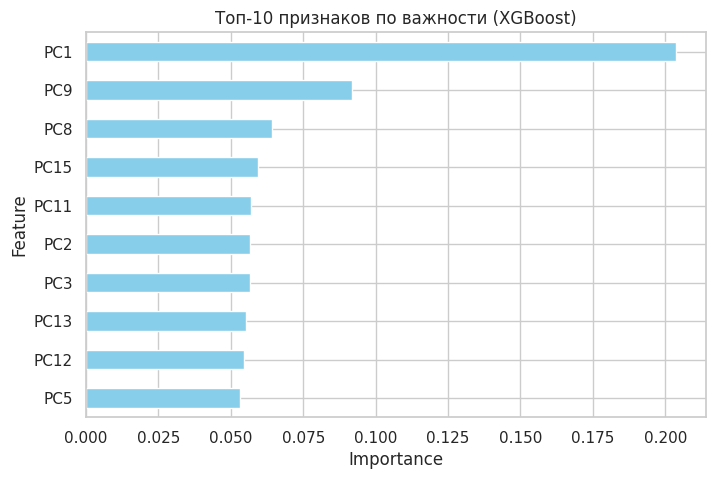

In [434]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# --- Считаем вес для редкого класса ---
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# --- XGBoost без use_label_encoder ---
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

# --- Сетка гиперпараметров ---
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'n_estimators': [100, 200]
}

# --- F1-score для класса 1 ---
f1_pos_scorer = make_scorer(f1_score, pos_label=1)

# --- Кросс-валидация ---
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=f1_pos_scorer,
    cv=cv,
    n_jobs=3,
    verbose=0
)

# --- Обучение на PCA-признаках ---
grid_search.fit(X_train_pca_df, y_train)

# --- Лучший классификатор ---
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_pca_df)

# --- Результаты ---
print("=== Лучшие параметры ===")
print(grid_search.best_params_)

print("\n=== F1-score для класса 1 на тесте ===")
print(f1_score(y_test, y_pred_best, pos_label=1))

print("\n=== Полный отчёт классификации ===")
print(classification_report(y_test, y_pred_best, digits=3))

# --- Важность признаков ---
feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train_pca_df.columns)
top10_features = feature_importances.sort_values(ascending=False).head(10)

print("=== Топ-10 важных признаков ===")
print(top10_features)

# --- Визуализация топ-10 ---
plt.figure(figsize=(8,5))
top10_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Топ-10 признаков по важности (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Интерпретация топовых PCA-компонент через исходные признаки

**PC1 (важность 0.204)**  
- Основные признаки: `TotalDelinquencies`, `Num30-59Delinquencies`, `Num60-89Delinquencies`, `DelinquencyRate`  
- Комментарий: История просрочек и общая долговая нагрузка являются ключевыми для предсказания риска.

**PC9 (важность 0.092)**  
- Основные признаки: `DelinquencyRate`, `CreditRiskIndex`, `FinancialStability`, `DIR_per_Loan`  
- Комментарий: Финансовая дисциплина и кредитный риск играют значительную роль.

**PC8 (важность 0.064)**  
- Основные признаки: `FinancialStability`, `DelinquencyRate`, `NumDependents`, `Age`  
- Комментарий: Общая финансовая устойчивость клиента — критичный фактор.

**PC15 (важность 0.059)**  
- Основные признаки: `NumRealEstateLoans`, `RealEstate_Ratio`, `DIR_per_Loan`, `DIR`  
- Комментарий: Кредитная активность по недвижимости и долговая нагрузка влияют на прогноз.

**PC11 (важность 0.057)**  
- Основные признаки: `NumDependents`, `Age`, `CreditRiskIndex`, `DIR_per_Loan`  
- Комментарий: Социально-демографические факторы дополняют финансовую картину.

**PC2 (важность 0.057)**  
- Основные признаки: `NumRealEstateLoans`, `DIR`, `DIR_per_Loan`, `RealEstate_Ratio`  
- Комментарий: Кредиты на недвижимость и долговая нагрузка также значимы для модели.

**PC3 (важность 0.057)**  
- Основные признаки: `Age_Dependent_Ratio`, `NumDependents`, `Age`, `NumRealEstateLoans`  
- Комментарий: Взаимосвязь возраста и числа иждивенцев отражает социально-демографические аспекты риска.

**PC13 (важность 0.055)**  
- Основные признаки: `Loan_Volume_encoded`, `NumLoans`, `RealEstate_Ratio`, `NumRealEstateLoans`  
- Комментарий: Общее количество и объем кредитов сильно влияют на предсказания.

**PC12 (важность 0.055)**  
- Основные признаки: `DebtBurden`, `BalanceToCreditLimit`, `Loan_Volume_encoded`, `RealEstate_Ratio`  
- Комментарий: Долговая нагрузка и соотношение баланса к кредитному лимиту важны для оценки риска.

**PC5 (важность 0.053)**  
- Основные признаки: `Income`, `Income_per_Dependent`, `NumLoans`, `Loan_Volume_encoded`  
- Комментарий: Уровень дохода и кредитная нагрузка на одного иждивенца имеют значение для модели.

---

### Короткий анализ

1. **Финансовые показатели** (`TotalDelinquencies`, `DebtBurden`, `DelinquencyRate`, `BalanceToCreditLimit`, `CreditRiskIndex`) доминируют среди важных признаков.  
2. **Кредиты на недвижимость** (`NumRealEstateLoans`, `RealEstate_Ratio`) играют второстепенную, но заметную роль.  
3. **Социально-демографические признаки** (`Age`, `NumDependents`, `Age_Dependent_Ratio`) вносят вспомогательную информацию.  
4. **Доход и нагрузка на одного иждивенца** влияют на прогноз, но менее сильно, чем долговые показатели.  

**Вывод:** Модель XGBoost опирается преимущественно на реальные финансовые характеристики заемщика, с дополнительной поддержкой социально-демографических факторов. PCA позволяет интерпретировать важность признаков в комбинации, но ключевые исходные переменные остаются очевидными.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, classification_report
import warnings

warnings.filterwarnings("ignore")  # убираем предупреждения

# --- XGBoost с GPU ---
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    tree_method='gpu_hist',       # GPU ускорение
    gpu_id=0                       # номер видеокарты
)

# --- Ограниченная сетка гиперпараметров ---
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'n_estimators': [100, 200]
}

# --- F1-score для класса 1 ---
f1_pos_scorer = make_scorer(f1_score, pos_label=1)

# --- Кросс-валидация ---
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=f1_pos_scorer,
    cv=cv,
    n_jobs=3,   # ограничиваем ядра
    verbose=0
)

# --- Обучение ---
grid_search_xgb.fit(X_train_pca_df, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_pca_df)

print("=== XGBoost: лучшие параметры ===")
print(grid_search_xgb.best_params_)

print("\n=== XGBoost: F1-score класса 1 на тесте ===")
print(f1_score(y_test, y_pred_xgb, pos_label=1))

print("\n=== XGBoost: Полный отчёт классификации ===")
print(classification_report(y_test, y_pred_xgb, digits=3))


/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/usr/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


=== XGBoost: лучшие параметры ===
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

=== XGBoost: F1-score класса 1 на тесте ===
0.3179417277219288

=== XGBoost: Полный отчёт классификации ===
              precision    recall  f1-score   support

           0      0.969     0.837     0.898     20996
           1      0.214     0.620     0.318      1504

    accuracy                          0.822     22500
   macro avg      0.591     0.728     0.608     22500
weighted avg      0.918     0.822     0.859     22500



In [432]:
from catboost import CatBoostClassifier

# --- CatBoost с GPU
cb = CatBoostClassifier(
    iterations=150,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    task_type='GPU',
    devices='0',
    gpu_ram_part=0.76,
    bootstrap_type='Bernoulli',  # важно для использования subsample
    subsample=0.8,
    verbose=0,
    class_weights=[1, scale_pos_weight]
)
# --- Кросс-валидация с небольшой сеткой ---
from sklearn.model_selection import GridSearchCV

cb_param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'iterations': [200, 500]
}

cv_cb = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search_cb = GridSearchCV(
    estimator=cb,
    param_grid=cb_param_grid,
    scoring=f1_pos_scorer,
    cv=cv_cb,
    n_jobs=1,
    verbose=0
)

# --- Обучение ---
grid_search_cb.fit(X_train_pca_df, y_train)

best_cb = grid_search_cb.best_estimator_
y_pred_cb = best_cb.predict(X_test_pca_df)

print("=== CatBoost: лучшие параметры ===")
print(grid_search_cb.best_params_)

print("\n=== CatBoost: F1-score класса 1 на тесте ===")
print(f1_score(y_test, y_pred_cb, pos_label=1))

print("\n=== CatBoost: Полный отчёт классификации ===")
print(classification_report(y_test, y_pred_cb, digits=3))


=== CatBoost: лучшие параметры ===
{'depth': 6, 'iterations': 200, 'learning_rate': 0.05}

=== CatBoost: F1-score класса 1 на тесте ===
0.30687830687830686

=== CatBoost: Полный отчёт классификации ===
              precision    recall  f1-score   support

           0      0.969     0.820     0.888     20996
           1      0.202     0.636     0.307      1504

    accuracy                          0.808     22500
   macro avg      0.586     0.728     0.598     22500
weighted avg      0.918     0.808     0.850     22500



# Итог

### Лучшая полученная модель: RandomForestClassifier

**Параметры:** `{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}`

**Метрики (тест):**

* Accuracy: 0.864
* F1-score (weighted): 0.885
* **Macro F1 (целевая): 0.634**

**Classification Report:**

| Класс            | Precision | Recall | F1-score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| 0                | 0.964     | 0.887  | 0.924    | 20996   |
| 1                | 0.254     | 0.536  | 0.345    | 1504    |
| **macro avg**    | 0.609     | 0.712  | 0.634    | 22500   |
| **weighted avg** | 0.916     | 0.864  | 0.885    | 22500   |